### Project Based-Intern: Rakamin Academy x Id/x Partners

# Data Understanding

## 1. Importing Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Machine Learning
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy import stats
from scipy.stats import skew
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.model_selection import StratifiedKFold

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [2]:
# get the dataset using pandas documentation

raw_data = pd.read_csv('loan_data_2007_2014.csv')

## 3. Quick look into the Dataset

In [3]:
# checking basic info of 'loan_data' in pandas

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# reading the 'loan_data' in pandas

raw_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Statistics Summaries

In [5]:
numeric    = raw_data.select_dtypes(exclude='object')
categoric  = raw_data.select_dtypes(include='object')
target     = raw_data[['loan_status']]
num_column = numeric.columns
cat_column = categoric.columns

In [6]:
# Numerical Feature

numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [7]:
# Categoric Feature
categoric.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [8]:
# Target Feature
target.describe().T

,count,unique,top,freq
loan_status,466285,9,Current,224226


In [9]:
# Check column 'loan_status'.
raw_data.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
# View Percentage of loan_status
raw_data['loan_status'].value_counts() / raw_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

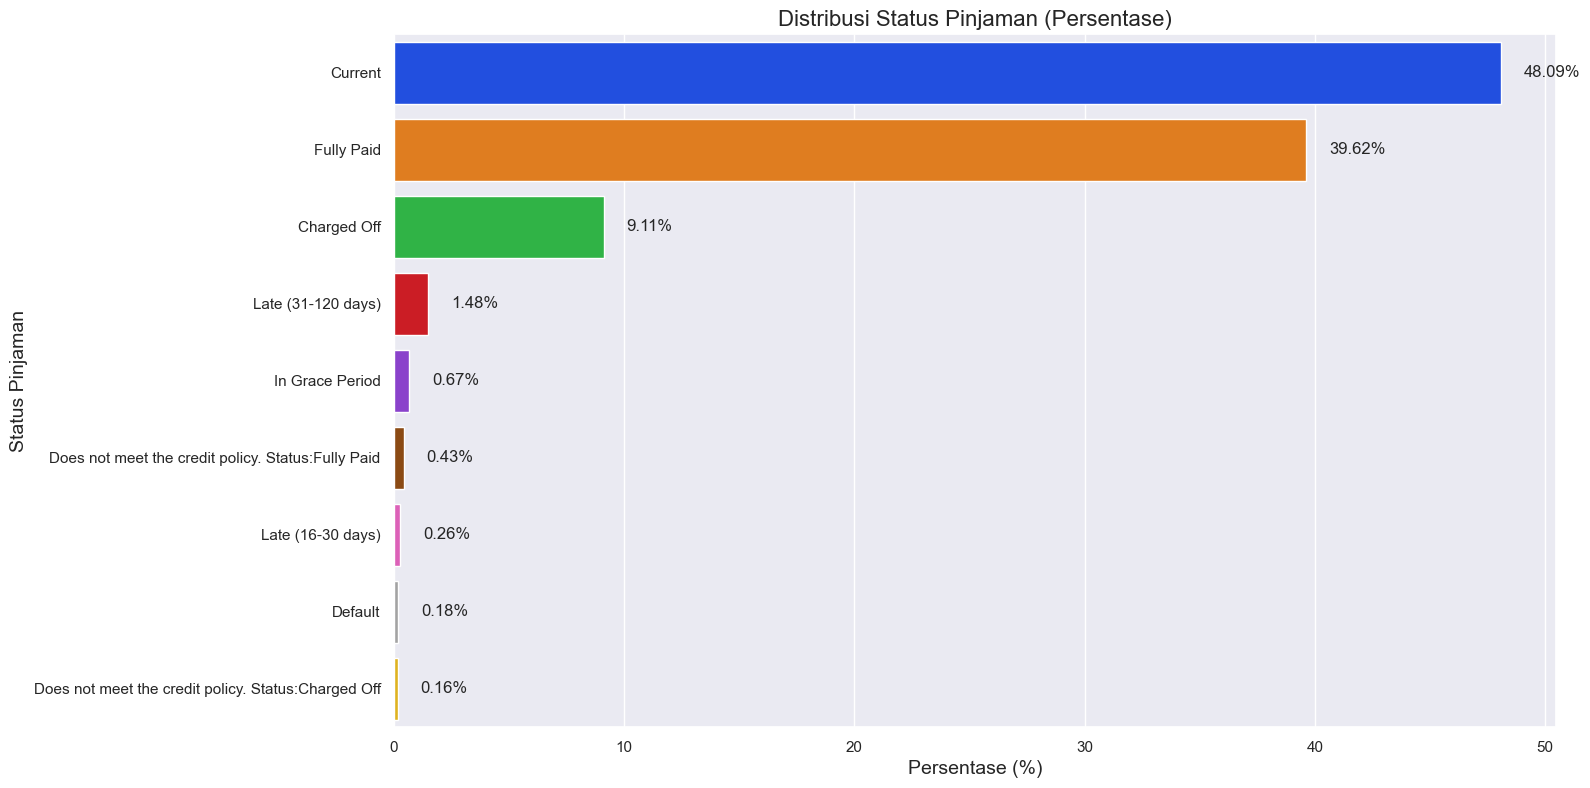

In [11]:
# Counts the total number of rows in a dataframe
total_data = len(raw_data)

# Sets the plot style
sns.set(style='darkgrid', palette='bright')

# Create a subplot of a specified size
fig, ax = plt.subplots(figsize=(15, 9))

# Calculates the frequency of each value in the 'loan_status' column
loan_status_counts = raw_data['loan_status'].value_counts()

# Calculates percentages and sorts by largest value
loan_status_percentages = (loan_status_counts / total_data * 100).sort_values(ascending=False)

# Create a horizontal barplot
sns.barplot(y=loan_status_percentages.index, x=loan_status_percentages.values, ax=ax, palette='bright')

# Added axis labels and plot titles
ax.set_xlabel('Persentase (%)', fontsize=14)
ax.set_ylabel('Status Pinjaman', fontsize=14)
ax.set_title('Distribusi Status Pinjaman (Persentase)', fontsize=16)

# Adds a percentage value to the right of the bar
for index, value in enumerate(loan_status_percentages):
    ax.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12)

plt.show()

Pada Feature Target (loan_status) perlu dilakukan klasifikasi lebih lanjut untuk menyederhanakan jumlah kategori hanya menjadi Good loan dan Bad Loan

In [12]:
# check duplicated values

raw_data.duplicated().sum()

0

# 5 Removing Unused Column

In [13]:
loan_data = raw_data.drop([
            # Feature with only 1 value
            'application_type',
            'policy_code',
            
            # Feature High Cardinality
            'emp_title',
            'title',
        
            # Feature Dominated by 1 Value
            'pymnt_plan',
            
            # All Null
            'annual_inc_joint',
            'dti_joint',
            'verification_status_joint',
            'open_acc_6m',
            'open_il_6m',
            'open_il_12m',
            'open_il_24m',
            'mths_since_rcnt_il',
            'total_bal_il',
            'il_util',
            'open_rv_12m',
            'open_rv_24m',
            'max_bal_bc',
            'all_util',
            'inq_fi',
            'total_cu_tl',
            'inq_last_12m',            
            
            # irrelevant
            'Unnamed: 0',
            'id',
            'url',
            'member_id',
            'sub_grade',
            'addr_state',
            'zip_code',
            'desc',
            'mths_since_last_delinq',
            'mths_since_last_record',
            'mths_since_last_major_derog'], axis=1)

In [14]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,0.00,Jan-15,171.62,NaN,Jan-16,0.0,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,0.00,Jun-14,649.91,NaN,Jan-16,0.0,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,0.00,Jan-15,357.48,NaN,Jan-15,0.0,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,0.0,NaN,NaN,NaN


## 6. DataViz

In [15]:
num         = loan_data.select_dtypes(exclude='object')
cat         = loan_data.select_dtypes(include='object')
target      = loan_data[['loan_status']]
num_column  = num.columns
cat_column  = cat.columns

### 6.1 Univariate

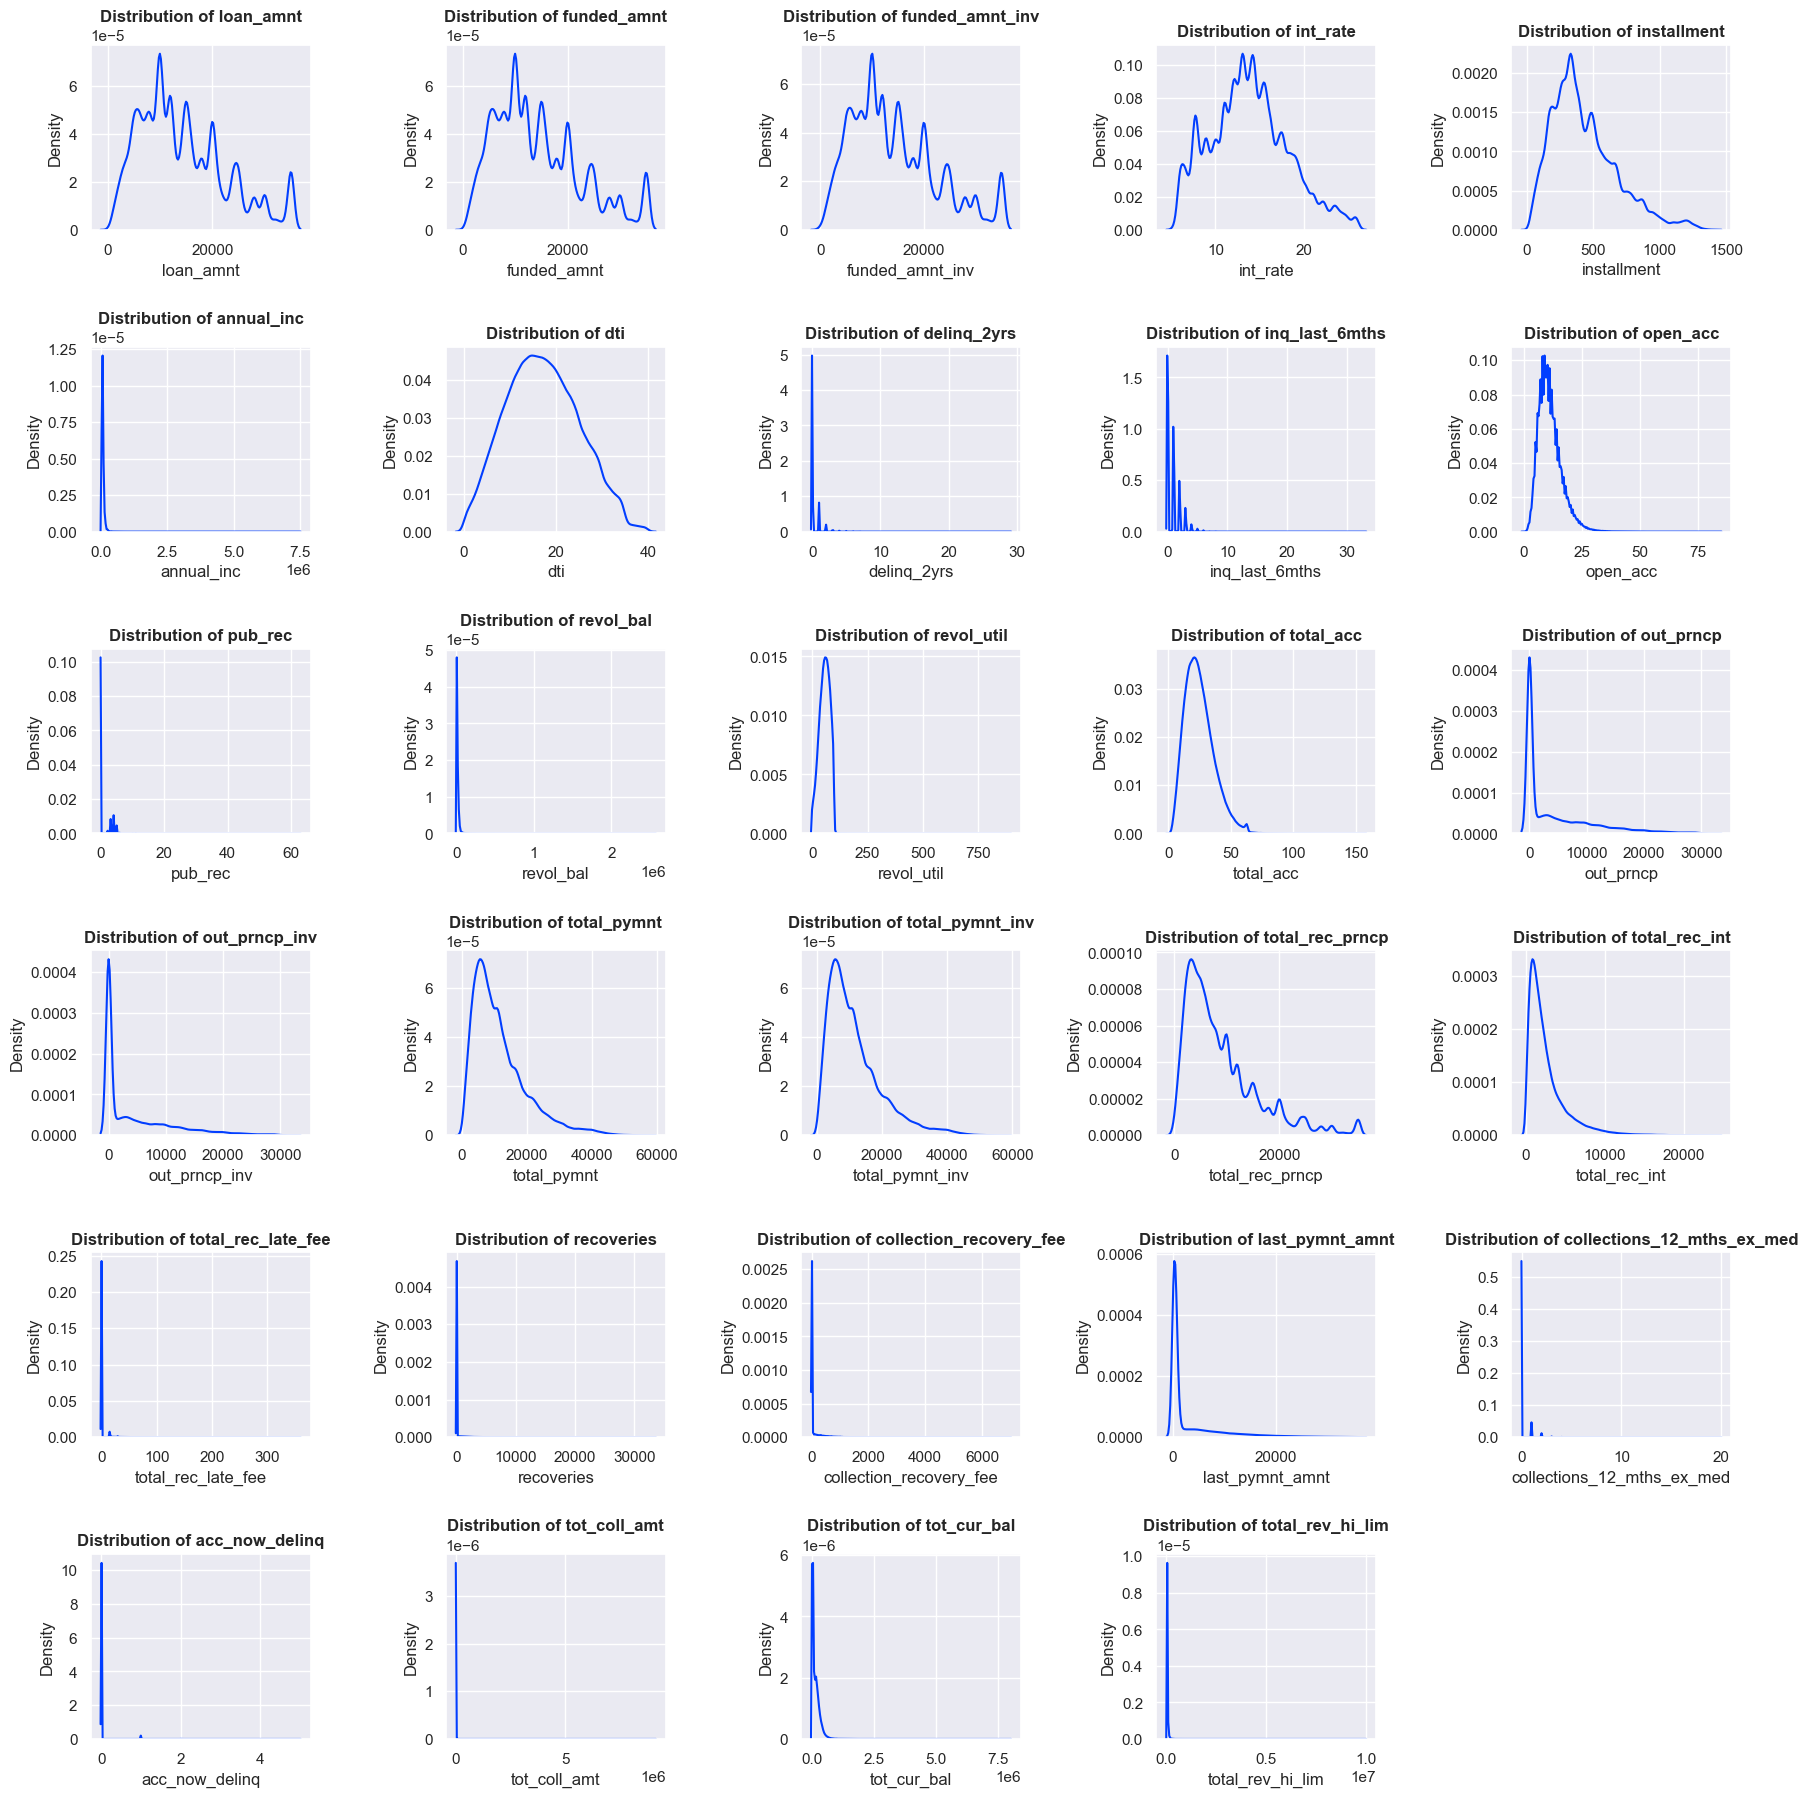

In [16]:
# KDE Plot
num_plots = len(num_column)
num_rows = (num_plots // 4) + 1
num_cols = 5 

rcParams['figure.figsize'] = 18, 3  * num_rows

for i in range(0, num_plots):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(x=loan_data[num_column[i]])
    plt.xlabel(num_column[i])
    plt.title('Distribution of ' + num_column[i], fontsize=12, fontweight='bold')
    plt.tight_layout(pad=2)

plt.show()

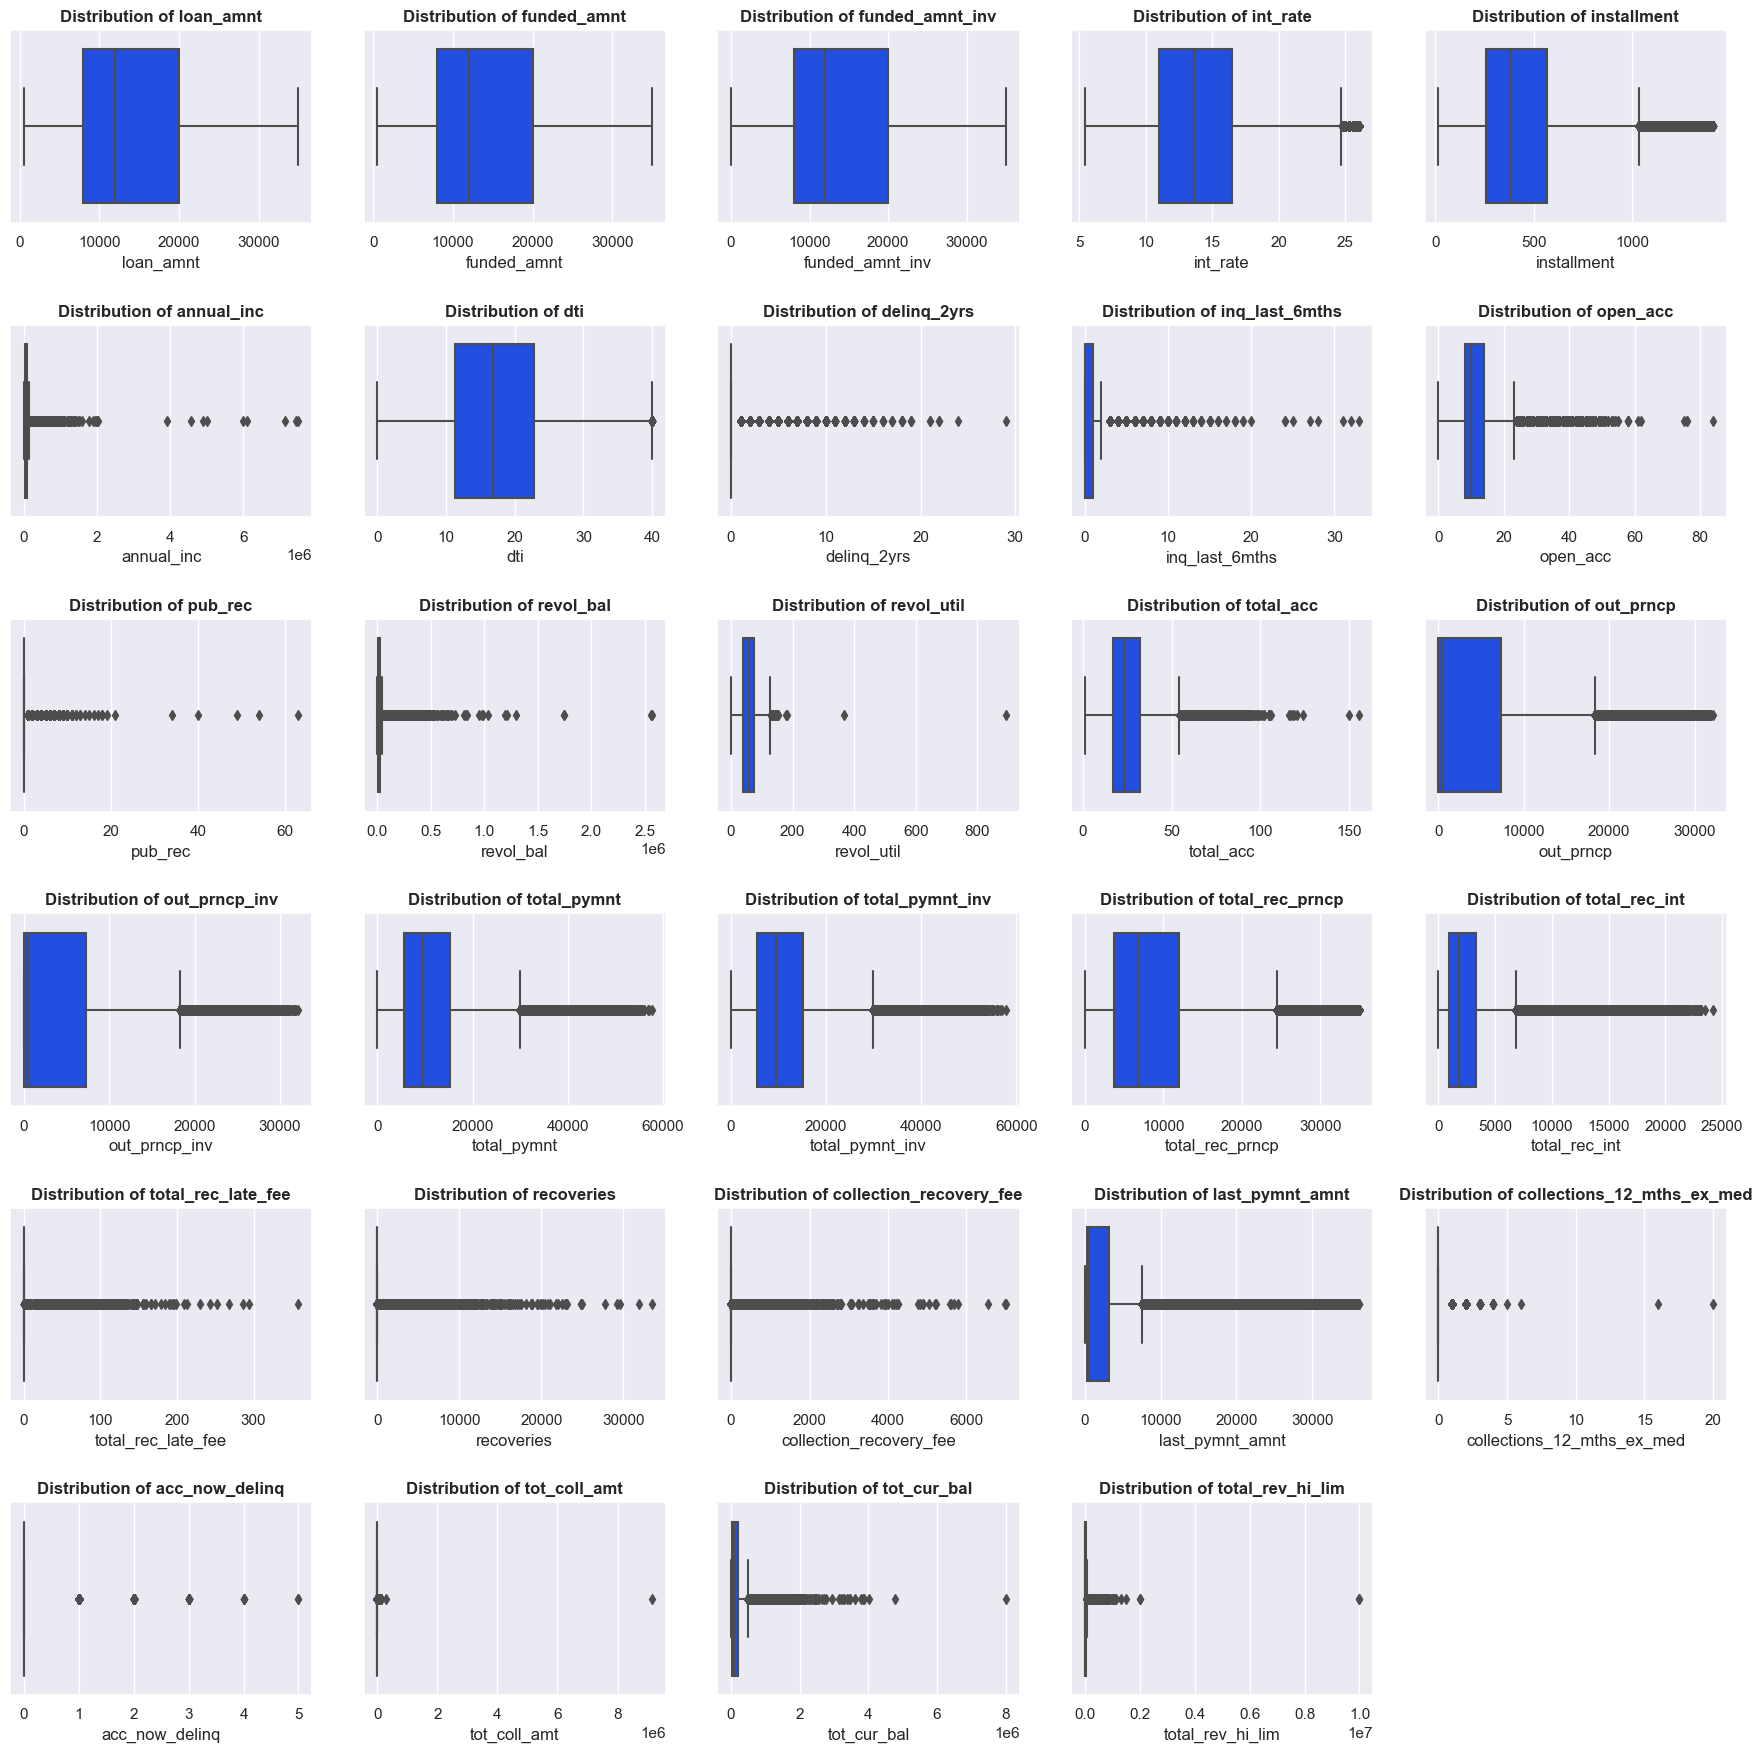

In [17]:
# Box Plot
num_plots = len(num_column)
num_rows = (num_plots // 5) + 1 
num_cols = 5  

rcParams['figure.figsize'] = 18, 3 * num_rows  

for i in range(0, num_plots):
    plt.subplot(num_rows, num_cols, i + 1) 
    sns.boxplot(x=loan_data[num_column[i]])
    plt.title('Distribution of ' + num_column[i], fontsize=12, fontweight='bold')
    plt.tight_layout(pad=2)

# Display the plots
plt.show()

## 6.2 Multivariate

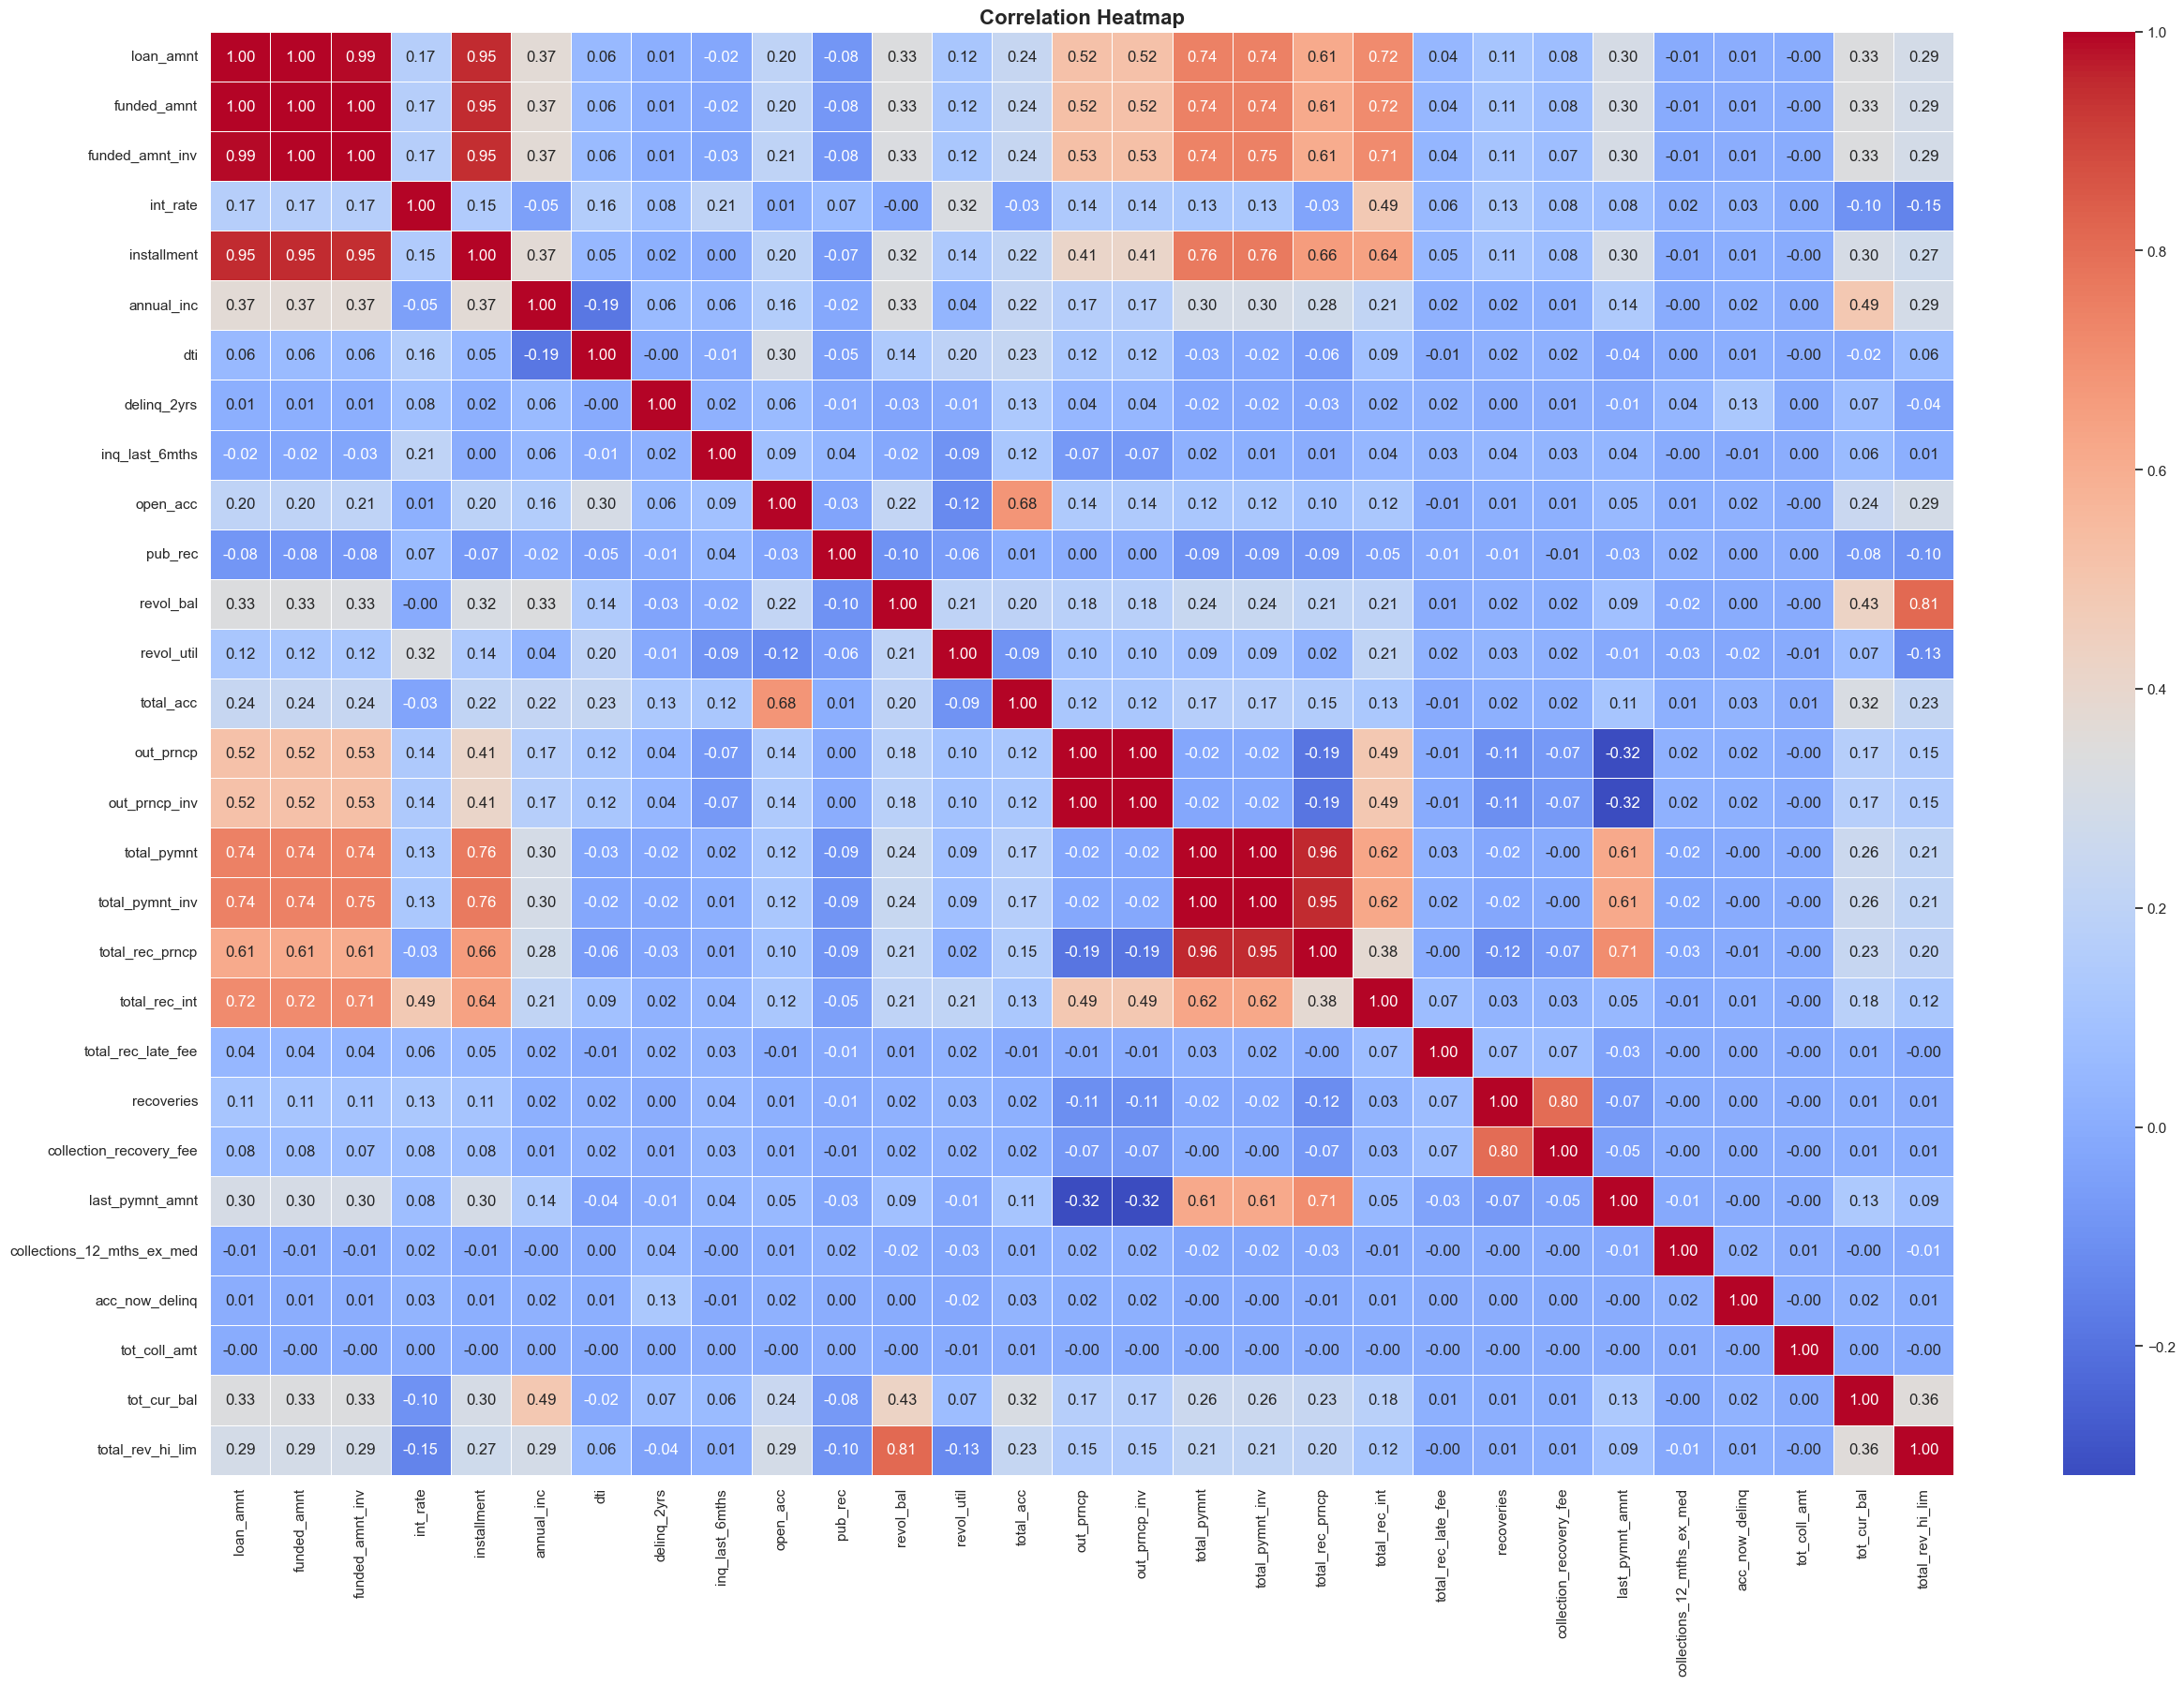

In [18]:
corr_matrix = num.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

- loan_amnt, funded_amnt, funded_amnt_inv memiliki korelasi serupa dengan kolom lainnya. Jadi kolom-kolom ini mungkin memiliki data yang hampir serupa

In [19]:
# Check the suspect similar columns
loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888
std,8286.509164,8274.371300,8297.637788
min,500.000000,500.000000,0.000000
25%,8000.000000,8000.000000,8000.000000
50%,12000.000000,12000.000000,12000.000000
75%,20000.000000,20000.000000,19950.000000
max,35000.000000,35000.000000,35000.000000


In [20]:
# based on the output, the data is so similar, and we can remove 2 of them.
loan_data.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)

# Data Preparation

## 1. Data Quality Check and Missing Value 

### 1.1 Percentage of missing values for columns and rows

In [21]:
# Function to impute missing values by column
def missing_value_table(df):
    # Total Missing Value
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Create a table with calculation results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename columns in the table
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Jumlah Nilai Hilang', 1: '% dari Total Nilai'})
    
    # Sorts the table based on the percentage of missing values in descending order
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% dari Total Nilai', ascending=False).round(1)
    
    # Displays Summary Information
    print("Dataframe yang Anda pilih memiliki " + str(df.shape[1]) + " kolom.\n"
          "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
          " kolom yang memiliki nilai yang hilang.")
    
    # Returns a dataframe with missing value information
    return mis_val_table_ren_columns


In [22]:
# Displays Missing Value Statistics
missing_values = missing_value_table(loan_data)
missing_values

Dataframe yang Anda pilih memiliki 40 kolom.
Terdapat 17 kolom yang memiliki nilai yang hilang.


,Jumlah Nilai Hilang,% dari Total Nilai
next_pymnt_d,227214,48.7
total_rev_hi_lim,70276,15.1
tot_cur_bal,70276,15.1
tot_coll_amt,70276,15.1
emp_length,21008,4.5
last_pymnt_d,376,0.1
revol_util,340,0.1
collections_12_mths_ex_med,145,0.0
last_credit_pull_d,42,0.0
open_acc,29,0.0


In [23]:
# checking rows-wise null percentages

rows = pd.DataFrame(loan_data.isnull().sum(axis=1), columns=['num_missing_value'])
rows

,num_missing_value
0,4
1,4
2,4
3,4
4,3
...,...
466280,0
466281,1
466282,0
466283,1


### 1.2. Check n Unique

In [24]:
# check n Unique of each column
loan_data.nunique()

loan_amnt                       1352
term                               2
int_rate                         506
installment                    55622
grade                              7
emp_length                        11
home_ownership                     6
annual_inc                     31901
verification_status                3
issue_d                           91
loan_status                        9
purpose                           14
dti                             3997
delinq_2yrs                       24
earliest_cr_line                 664
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
initial_list_status                2
out_prncp                     135665
out_prncp_inv                 141189
total_pymnt                   351609
total_pymnt_inv               347659
total_rec_prncp               172713
t

### 1.3 Understanding Best Imputation Technique for ~4% Mising Values

The Focus columns for this analysis:

emp_length

In [25]:
# checking the data types of focus column

focus_col = ['emp_length']
loan_data[focus_col].dtypes

emp_length    object
dtype: object

In [26]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [27]:
# checking values/entries of categorical column

for col in focus_col:
    print(f'\033[1mpercentage of each record in {col}\033[0m')
    print(loan_data[col].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {col}\033[0m')
    print(loan_data[col].value_counts())

percentage of each record in emp_length
10+ years    33.697900
2 years       9.291520
3 years       8.218704
< 1 year      8.144369
5 years       6.911204
1 year        6.652488
4 years       6.293386
7 years       5.879486
6 years       5.864215
8 years       5.029454
9 years       4.017275
Name: emp_length, dtype: float64
__________________________________________________ 

value counts of column emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64


In [28]:
# using map function to mapping 'emp_length' column 

mapping_emp_length = {
    '10+ years': 10,
    '2 years': 2,
    '3 years': 3,
    '< 1 year': 0,
    '5 years': 5,
    '1 year': 1,
    '4 years': 4,
    '7 years': 7,
    '6 years': 6,
    '8 years': 8,
    '9 years': 9
}

In [29]:
# applying mapping into dataset

loan_data['emp_length'] = loan_data['emp_length'].map(mapping_emp_length)
loan_data['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [30]:
# show 'emp_length' missing value

loan_data['emp_length'].isna().sum()

21008

In [31]:
# calculating percentage of each record in the dataframe

loan_data['emp_length'].value_counts(normalize=True)*100

10.0    33.697900
2.0      9.291520
3.0      8.218704
0.0      8.144369
5.0      6.911204
1.0      6.652488
4.0      6.293386
7.0      5.879486
6.0      5.864215
8.0      5.029454
9.0      4.017275
Name: emp_length, dtype: float64

In [32]:
loan_data['emp_length'].describe()

count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

### 1.4 Understanding Best Imputation Technique for ~15% Mising Values

the focus columns for this analysis:

total_rev_hi_lim <br/>
tot_coll_amt <br/>
tot_cur_bal <br/>

In [33]:
focus_col2 = ['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']
loan_data[focus_col2].dtypes

total_rev_hi_lim    float64
tot_coll_amt        float64
tot_cur_bal         float64
dtype: object

In [34]:
loan_data[focus_col2].sample(10)

,total_rev_hi_lim,tot_coll_amt,tot_cur_bal
356612,24600.0,96.0,52319.0
236491,4400.0,0.0,655021.0
164510,17300.0,0.0,32065.0
40616,NaN,NaN,NaN
118798,25300.0,0.0,160557.0
308281,23600.0,0.0,159866.0
419313,71400.0,0.0,38120.0
254657,6400.0,0.0,9858.0
167305,20900.0,208.0,25441.0
378283,12400.0,18326.0,21395.0


#### 1.4.1. total_rev_hi_lim: total batas kredit/kredit tinggi yang bergulir

<Axes: >

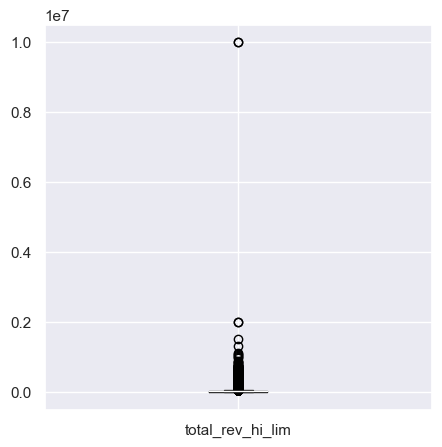

In [35]:
plt.figure(figsize=(5, 5))

loan_data.boxplot(column=['total_rev_hi_lim'])

In [36]:
for index, col in enumerate(focus_col2):
    print(f"{index} {col}")

0 total_rev_hi_lim
1 tot_coll_amt
2 tot_cur_bal


In [37]:
# checking values/entries of numerical column

for col in focus_col2:
    print(f'\033[1mpercentage of each record in {focus_col2[0]}\033[0m')
    print(loan_data[focus_col2[0]].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {focus_col2[0]}\033[0m')
    print(loan_data[focus_col2[0]].value_counts())
    print('_____'*10, '\n')
    print(f'\033[1mstatistics of column {focus_col2[0]}\033[0m')
    print(loan_data[focus_col2[0]].describe())
    print('_____'*10, '\n')
    break

percentage of each record in total_rev_hi_lim
15000.0     0.351507
13500.0     0.334336
10000.0     0.332316
12000.0     0.328528
12500.0     0.326760
              ...   
29117.0     0.000253
31243.0     0.000253
84434.0     0.000253
89535.0     0.000253
479500.0    0.000253
Name: total_rev_hi_lim, Length: 14612, dtype: float64
__________________________________________________ 

value counts of column total_rev_hi_lim
15000.0     1392
13500.0     1324
10000.0     1316
12000.0     1301
12500.0     1294
            ... 
29117.0        1
31243.0        1
84434.0        1
89535.0        1
479500.0       1
Name: total_rev_hi_lim, Length: 14612, dtype: int64
__________________________________________________ 

statistics of column total_rev_hi_lim
count    3.960090e+05
mean     3.037909e+04
std      3.724713e+04
min      0.000000e+00
25%      1.350000e+04
50%      2.280000e+04
75%      3.790000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64
_______________________________

#### 1.4.2. tot_coll_amt: total jumlah penagihan yang terutang

<Axes: >

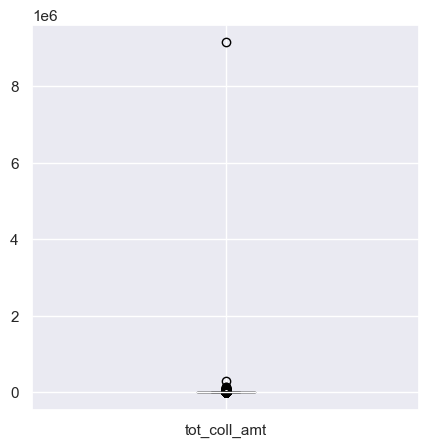

In [38]:
plt.figure(figsize=(5, 5))

loan_data.boxplot(column=['tot_coll_amt'])

In [39]:
# checking values/entries of numerical column

for col in focus_col2:
    print(f'\033[1mpercentage of each record in {focus_col2[1]}\033[0m')
    print(loan_data[focus_col2[1]].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {focus_col2[1]}\033[0m')
    print(loan_data[focus_col2[1]].value_counts())
    print('_____'*10, '\n')
    print(f'\033[1mstatistics of column {focus_col2[1]}\033[0m')
    print(loan_data[focus_col2[1]].describe())
    print('_____'*10, '\n')
    break

percentage of each record in tot_coll_amt
0.0        87.437154
50.0        0.211359
100.0       0.164138
75.0        0.130048
60.0        0.078029
             ...    
13779.0     0.000253
15036.0     0.000253
15986.0     0.000253
2477.0      0.000253
6532.0      0.000253
Name: tot_coll_amt, Length: 6321, dtype: float64
__________________________________________________ 

value counts of column tot_coll_amt
0.0        346259
50.0          837
100.0         650
75.0          515
60.0          309
            ...  
13779.0         1
15036.0         1
15986.0         1
2477.0          1
6532.0          1
Name: tot_coll_amt, Length: 6321, dtype: int64
__________________________________________________ 

statistics of column tot_coll_amt
count    3.960090e+05
mean     1.919135e+02
std      1.463021e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64
______________________________________________

#### 1.4.3. tot_cur_bal: total saldo saat ini dari semua akun

<Axes: >

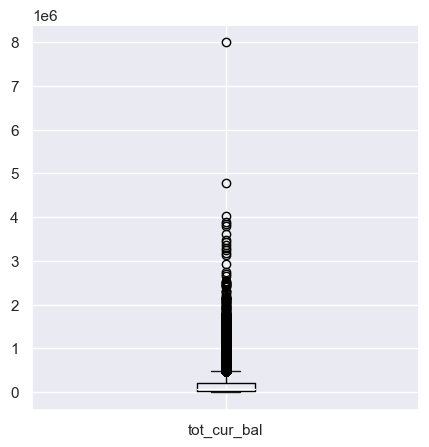

In [40]:
plt.figure(figsize=(5, 5))

loan_data.boxplot(column=['tot_cur_bal'])

In [41]:
# checking values/entries of numerical column

for col in focus_col2:
    print(f'\033[1mpercentage of each record in {focus_col2[2]}\033[0m')
    print(loan_data[focus_col2[2]].value_counts(normalize=True)*100)
    print('_____'*10, '\n')
    print(f'\033[1mvalue counts of column {focus_col2[2]}\033[0m')
    print(loan_data[focus_col2[2]].value_counts())
    print('_____'*10, '\n')
    print(f'\033[1mstatistics of column {focus_col2[2]}\033[0m')
    print(loan_data[focus_col2[2]].describe())
    print('_____'*10, '\n')
    break

percentage of each record in tot_cur_bal
0.0         0.019697
14186.0     0.003788
23254.0     0.003788
28674.0     0.003535
30491.0     0.003535
              ...   
179524.0    0.000253
217367.0    0.000253
111276.0    0.000253
260290.0    0.000253
57477.0     0.000253
Name: tot_cur_bal, Length: 220690, dtype: float64
__________________________________________________ 

value counts of column tot_cur_bal
0.0         78
14186.0     15
23254.0     15
28674.0     14
30491.0     14
            ..
179524.0     1
217367.0     1
111276.0     1
260290.0     1
57477.0      1
Name: tot_cur_bal, Length: 220690, dtype: int64
__________________________________________________ 

statistics of column tot_cur_bal
count    3.960090e+05
mean     1.388017e+05
std      1.521147e+05
min      0.000000e+00
25%      2.861800e+04
50%      8.153900e+04
75%      2.089530e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64
__________________________________________________ 



### 1.5 understanding best imputation technique for ~48% mising values

<strong> the focus column for this analysis:

next_pymnt_d

In [42]:
focus_col3 = ['next_pymnt_d']

for col in focus_col3:
    print (f'\033[1mdata types of column {col}\033[m')
    print (loan_data[col].dtypes)
    print ('_____'*15, '\n')
    print (f'\033[1munique value of column {col}\033[m')
    print (loan_data[col].unique())
    print ('_____'*15, '\n')

data types of column next_pymnt_d
object
___________________________________________________________________________ 

unique value of column next_pymnt_d
[nan 'Feb-16' 'Jan-16' 'Sep-13' 'Feb-14' 'May-14' 'Jun-13' 'Mar-12'
 'Apr-12' 'May-13' 'Aug-12' 'Aug-13' 'Jun-12' 'Nov-13' 'Feb-12' 'Oct-11'
 'Jan-13' 'Jan-14' 'Jul-13' 'Jul-15' 'Jan-12' 'Dec-12' 'Jun-11' 'Feb-13'
 'Nov-11' 'Nov-12' 'Dec-11' 'Aug-11' 'Sep-11' 'Apr-11' 'Mar-14' 'Apr-13'
 'Mar-11' 'Jul-12' 'Aug-14' 'Oct-13' 'Sep-12' 'May-12' 'Apr-15' 'Jul-11'
 'Dec-15' 'Dec-13' 'Jan-11' 'Oct-12' 'Nov-14' 'Mar-13' 'Aug-15' 'Feb-15'
 'May-15' 'Jul-14' 'Nov-15' 'Sep-14' 'Oct-15' 'May-11' 'Feb-11' 'Dec-14'
 'Jun-15' 'Apr-14' 'Jan-15' 'Sep-15' 'Jun-14' 'Nov-10' 'Oct-10' 'Dec-10'
 'Mar-15' 'Oct-14' 'Jul-10' 'Sep-10' 'May-10' 'Aug-10' 'Mar-10' 'Jun-10'
 'Apr-10' 'Feb-10' 'Dec-09' 'Nov-09' 'Oct-09' 'Jan-10' 'Sep-09' 'Jun-09'
 'Aug-09' 'Jul-09' 'May-09' 'Apr-09' 'Jan-09' 'Oct-08' 'Feb-09' 'Nov-08'
 'Sep-08' 'Mar-09' 'Dec-08' 'Aug-08' 'Jun-08' '

In [43]:
loan_data['next_pymnt_d_date'] = pd.to_datetime(loan_data['next_pymnt_d'], format='%b-%y')

loan_data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [44]:
loan_data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [45]:
loan_data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [46]:
loan_data.tail()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_next_pymnt_d
466280,18400,60 months,14.47,432.64,C,4.0,MORTGAGE,110000.0,Source Verified,Jan-14,...,0.0,Jan-16,432.64,Jan-16,0.0,0.0,0.0,294998.0,29900.0,22.0
466281,22000,60 months,19.97,582.50,D,10.0,MORTGAGE,78000.0,Verified,Jan-14,...,0.0,Dec-14,17.50,Jan-16,0.0,0.0,0.0,221830.0,39400.0,NaN
466282,20700,60 months,16.99,514.34,D,7.0,MORTGAGE,46000.0,Verified,Jan-14,...,0.0,Jan-16,514.34,Dec-15,0.0,0.0,0.0,73598.0,13100.0,22.0
466283,2000,36 months,7.90,62.59,A,3.0,OWN,83000.0,Verified,Jan-14,...,0.0,Dec-14,1500.68,Apr-15,0.0,0.0,0.0,591610.0,53100.0,NaN
466284,10000,36 months,19.20,367.58,D,10.0,MORTGAGE,46000.0,Verified,Jan-14,...,0.0,Jan-16,367.58,Jan-16,0.0,0.0,0.0,57477.0,16000.0,22.0


### 1.6 checking the data type of columns and  fixing the incorrect data types

#### 1.6.1 object

In [47]:
loan_data.select_dtypes(include='object')

,term,grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d
0,36 months,B,RENT,Verified,Dec-11,Fully Paid,credit_card,Jan-85,f,Jan-15,Jan-16
1,60 months,C,RENT,Source Verified,Dec-11,Charged Off,car,Apr-99,f,Apr-13,Sep-13
2,36 months,C,RENT,Not Verified,Dec-11,Fully Paid,small_business,Nov-01,f,Jun-14,Jan-16
3,36 months,C,RENT,Source Verified,Dec-11,Fully Paid,other,Feb-96,f,Jan-15,Jan-15
4,60 months,B,RENT,Source Verified,Dec-11,Current,other,Jan-96,f,Jan-16,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,MORTGAGE,Source Verified,Jan-14,Current,debt_consolidation,Apr-03,w,Jan-16,Jan-16
466281,60 months,D,MORTGAGE,Verified,Jan-14,Charged Off,debt_consolidation,Jun-97,f,Dec-14,Jan-16
466282,60 months,D,MORTGAGE,Verified,Jan-14,Current,debt_consolidation,Dec-01,f,Jan-16,Dec-15
466283,36 months,A,OWN,Verified,Jan-14,Fully Paid,credit_card,Feb-03,w,Dec-14,Apr-15


##### treatment for column: term

In [48]:
# checking unique value for term column
# objective: mapping column into integer data type

loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [49]:
# transform 'term' column into integer data type using mapping method

mapping_term = {
    ' 36 months': 36,
    ' 60 months': 60
}

loan_data['term'] = loan_data['term'].map(mapping_term)
loan_data['term'].unique()

array([36, 60], dtype=int64)

##### treatment for columns: grade

In [50]:
# checking values of DataFrame

focus_col4 = ['grade']

for col in focus_col4:
    print (f'\033[1mvalue counts of column {col}\033[0m')
    print (loan_data[col].value_counts())
    print ('_____'*10, '\n')

value counts of column grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
__________________________________________________ 



In [51]:
# Transform 'grade' using OHE
onehots = pd.get_dummies(loan_data['grade'], prefix='grade')
loan_data = loan_data.join(onehots)

In [52]:
loan_data = loan_data.drop(columns=['grade'])
loan_data.tail()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,tot_cur_bal,total_rev_hi_lim,mths_since_next_pymnt_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
466280,18400,60,14.47,432.64,4.0,MORTGAGE,110000.0,Source Verified,Jan-14,Current,...,294998.0,29900.0,22.0,0,0,1,0,0,0,0
466281,22000,60,19.97,582.50,10.0,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,...,221830.0,39400.0,NaN,0,0,0,1,0,0,0
466282,20700,60,16.99,514.34,7.0,MORTGAGE,46000.0,Verified,Jan-14,Current,...,73598.0,13100.0,22.0,0,0,0,1,0,0,0
466283,2000,36,7.90,62.59,3.0,OWN,83000.0,Verified,Jan-14,Fully Paid,...,591610.0,53100.0,NaN,1,0,0,0,0,0,0
466284,10000,36,19.20,367.58,10.0,MORTGAGE,46000.0,Verified,Jan-14,Current,...,57477.0,16000.0,22.0,0,0,0,1,0,0,0


##### treatment for columns: home_ownership & verification_status

In [53]:
# checking unique value of DataFrame

focus_col5 = ['home_ownership', 'verification_status']

for col in focus_col5:
    print (f'\033[1munique value of column {col}\033[0m')
    print (loan_data[col].unique())
    print ('_____'*10, '\n')

unique value of column home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
__________________________________________________ 

unique value of column verification_status
['Verified' 'Source Verified' 'Not Verified']
__________________________________________________ 



In [54]:
# Encoding 'home_ownership' and 'verification_status'
for cat in focus_col5:
    onehots = pd.get_dummies(loan_data[cat], prefix=cat)
    loan_data = loan_data.join(onehots)

In [55]:
loan_data = loan_data.drop(columns=['home_ownership', 'verification_status'])
loan_data.tail()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,purpose,dti,...,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
466280,18400,60,14.47,432.64,4.0,110000.0,Jan-14,Current,debt_consolidation,19.85,...,0,0,1,0,0,0,0,0,1,0
466281,22000,60,19.97,582.50,10.0,78000.0,Jan-14,Charged Off,debt_consolidation,18.45,...,0,0,1,0,0,0,0,0,0,1
466282,20700,60,16.99,514.34,7.0,46000.0,Jan-14,Current,debt_consolidation,25.65,...,0,0,1,0,0,0,0,0,0,1
466283,2000,36,7.90,62.59,3.0,83000.0,Jan-14,Fully Paid,credit_card,5.39,...,0,0,0,0,0,1,0,0,0,1
466284,10000,36,19.20,367.58,10.0,46000.0,Jan-14,Current,other,22.78,...,0,0,1,0,0,0,0,0,0,1


##### treatment for column: issue_d

In [56]:
loan_data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [57]:
# transform type data to date

# convert the 'issue_d' column to datetime object
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))

In [58]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [59]:
loan_data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [60]:
loan_data.tail()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,purpose,dti,delinq_2yrs,...,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,mths_since_issue_d
466280,18400,60,14.47,432.64,4.0,110000.0,Current,debt_consolidation,19.85,0.0,...,0,1,0,0,0,0,0,1,0,47.0
466281,22000,60,19.97,582.50,10.0,78000.0,Charged Off,debt_consolidation,18.45,0.0,...,0,1,0,0,0,0,0,0,1,47.0
466282,20700,60,16.99,514.34,7.0,46000.0,Current,debt_consolidation,25.65,0.0,...,0,1,0,0,0,0,0,0,1,47.0
466283,2000,36,7.90,62.59,3.0,83000.0,Fully Paid,credit_card,5.39,3.0,...,0,0,0,0,1,0,0,0,1,47.0
466284,10000,36,19.20,367.58,10.0,46000.0,Current,other,22.78,1.0,...,0,1,0,0,0,0,0,0,1,47.0


##### treatment for column: loan_status

In [61]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [62]:
# mapping 'loan_status' class with good loan and poor loan 
# good loan mapped as 1
# poor loan mapped as 0 
# good loan consists of: Fully Paid, Current, and Does not meet the credit policy: Fully Paid
# poor loan consists of: Charged Off, Default, In Grace Period, Late (16 - 30 days), Late (31-120 days) and Does not meet the credit policy: Charged Off

mapping_loan_status = {
    'Current':1,
    'Fully Paid':1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'In Grace Period':0,
    'Late (16-30 days)':0,
    'Charged Off':0,
    'Default':0,
    'Late (31-120 days)':0,
    'Does not meet the credit policy. Status:Charged Off':0
}

In [63]:
loan_data['loan_status'] = loan_data['loan_status'].map(mapping_loan_status)
loan_data['loan_status'].unique()

array([1, 0], dtype=int64)

##### treatment for column: purpose

purpose: a category provided by the borrower for the loan request

In [64]:
loan_data['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

Kolom ini mungkin dapat mendukung analisis ini untuk memprediksi kemampuan peminjam dalam melunasi pinjamannya. jadi, kita perlu melakukan pengkodean dengan metode one-hots.

In [65]:
focus_col6 = ['purpose']

# Encoding 'purpose' using OHE
for cat in focus_col6:
    onehots = pd.get_dummies(loan_data[cat], prefix=cat)
    loan_data = loan_data.join(onehots)

In [66]:
loan_data = loan_data.drop(columns=['purpose'])
loan_data.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,36,10.65,162.87,10.0,24000.0,1,27.65,0.0,Jan-85,...,0,0,0,0,0,0,0,0,0,0
1,2500,60,15.27,59.83,0.0,30000.0,0,1.00,0.0,Apr-99,...,0,0,0,0,0,0,0,0,0,0
2,2400,36,15.96,84.33,10.0,12252.0,1,8.72,0.0,Nov-01,...,0,0,0,0,0,0,0,1,0,0
3,10000,36,13.49,339.31,10.0,49200.0,1,20.00,0.0,Feb-96,...,0,0,0,0,0,1,0,0,0,0
4,3000,60,12.69,67.79,1.0,80000.0,1,17.94,0.0,Jan-96,...,0,0,0,0,0,1,0,0,0,0


##### treatment for columns: earliest_cr_line, last_pymnt_d, and last_credit_pull_d

In [67]:
focus_col7 = ['earliest_cr_line']

In [68]:
for col in focus_col7:
    print (f'unique value of column \033[1m{col}\033[0m')
    print (loan_data[col].unique())
    print ('____'*10, '\n')

unique value of column earliest_cr_line
['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98'
 'Dec-04' 'Oct-00' 'May-02' 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05'
 'Apr-95' 'Oct-02' 'Jan-00' 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99'
 'Nov-03' 'Jun-89' 'Jun-03' 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96'
 'Feb-84' 'Sep-02' 'Jan-86' 'May-98' 'Jan-97' 'Jun-05' 'Feb-90' 'Mar-04'
 'Jul-95' 'Aug-94' 'Jun-92' 'Mar-97' 'Apr-06' 'Apr-90' 'Aug-99' 'Sep-00'
 'Feb-01' 'Dec-88' 'Feb-99' 'Dec-91' 'Aug-00' 'Oct-04' 'Aug-04' 'Feb-05'
 'Nov-05' 'Nov-00' 'May-07' 'Jan-91' 'Jun-00' 'Aug-06' 'Dec-02' 'Jun-93'
 'Jun-06' '

In [69]:
# transform data type into datetime

from datetime import datetime, date

# convert the column to datetime object
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')
loan_data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [70]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [71]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [72]:
loan_data.loc[loan_data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = loan_data['mths_since_earliest_cr_line'].max()

In [73]:
loan_data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

##### treatment for column: last_pymnt_d

In [74]:
loan_data['last_pymnt_d_date'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y')
loan_data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [75]:
loan_data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [76]:
loan_data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

##### treatment for column: last_credit_pull_d

In [77]:
loan_data['last_credit_pull_d_date'] = pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y')
loan_data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [78]:
loan_data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [79]:
loan_data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

##### treatment for column: initial_status

In [80]:
focus_col8 = ['initial_list_status']

In [81]:
loan_data['initial_list_status'].value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

In [82]:
# Encoding 'initial_list_status'
for cat in focus_col8:
    onehots = pd.get_dummies(loan_data[cat], prefix=cat)
    loan_data = loan_data.join(onehots)

In [83]:
loan_data = loan_data.drop(columns=['initial_list_status'])

In [84]:
loan_data.tail()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,initial_list_status_f,initial_list_status_w
466280,18400,60,14.47,432.64,4.0,110000.0,1,19.85,0.0,2.0,...,0,0,0,0,0,176.0,23.0,23.0,0,1
466281,22000,60,19.97,582.50,10.0,78000.0,0,18.45,0.0,5.0,...,0,0,0,0,0,246.0,36.0,23.0,1,0
466282,20700,60,16.99,514.34,7.0,46000.0,1,25.65,0.0,2.0,...,0,0,0,0,0,192.0,23.0,24.0,1,0
466283,2000,36,7.90,62.59,3.0,83000.0,1,5.39,3.0,1.0,...,0,0,0,0,0,178.0,36.0,32.0,0,1
466284,10000,36,19.20,367.58,10.0,46000.0,1,22.78,1.0,0.0,...,1,0,0,0,0,214.0,23.0,23.0,1,0


#### 1.6.2 float

In [85]:
loan_data.select_dtypes(include='float')

,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,...,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_next_pymnt_d,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,83.7,...,0.0,0.0,NaN,NaN,NaN,NaN,72.0,395.0,35.0,23.0
1,15.27,59.83,0.0,30000.0,1.00,0.0,5.0,3.0,0.0,9.4,...,0.0,0.0,NaN,NaN,NaN,NaN,72.0,224.0,56.0,51.0
2,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,98.5,...,0.0,0.0,NaN,NaN,NaN,NaN,72.0,193.0,42.0,23.0
3,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,21.0,...,0.0,0.0,NaN,NaN,NaN,NaN,72.0,262.0,35.0,35.0
4,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,53.9,...,0.0,0.0,NaN,NaN,NaN,22.0,72.0,263.0,23.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,432.64,4.0,110000.0,19.85,0.0,2.0,18.0,0.0,77.6,...,0.0,0.0,0.0,294998.0,29900.0,22.0,47.0,176.0,23.0,23.0
466281,19.97,582.50,10.0,78000.0,18.45,0.0,5.0,18.0,1.0,46.3,...,0.0,0.0,0.0,221830.0,39400.0,NaN,47.0,246.0,36.0,23.0
466282,16.99,514.34,7.0,46000.0,25.65,0.0,2.0,18.0,0.0,51.1,...,0.0,0.0,0.0,73598.0,13100.0,22.0,47.0,192.0,23.0,24.0
466283,7.90,62.59,3.0,83000.0,5.39,3.0,1.0,21.0,0.0,21.5,...,0.0,0.0,0.0,591610.0,53100.0,NaN,47.0,178.0,36.0,32.0


In [86]:
# identifying columns that have .0 in the behind of each record
# so we can transform into integer without changing the real value of dataset

focus_col9 = ['emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim', 'mths_since_next_pymnt_d', 'mths_since_issue_d', 'mths_since_earliest_cr_line', 'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d']

In [87]:
# checking the value counts in each column

for col in focus_col9:
    print (f'value counts of column \033[1m{col}\033[0m')
    print (loan_data[col].value_counts())
    print('_____'*10, '\n')

value counts of column emp_length
10.0    150049
2.0      41373
3.0      36596
0.0      36265
5.0      30774
1.0      29622
4.0      28023
7.0      26180
6.0      26112
8.0      22395
9.0      17888
Name: emp_length, dtype: int64
__________________________________________________ 

value counts of column annual_inc
60000.0     17980
50000.0     15949
65000.0     13211
40000.0     12864
70000.0     12436
            ...  
93548.0         1
80840.0         1
257100.0        1
91660.0         1
72787.0         1
Name: annual_inc, Length: 31901, dtype: int64
__________________________________________________ 

value counts of column delinq_2yrs
0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0  

In [88]:
# checking the percentage of missing values in each column

for col in focus_col9:
    print (f'percentage of missing values in column \033[1m{col}\033[m')
    print (round(100.0* loan_data[col].isnull().sum()/len(loan_data[col]), 2))
    print('_____'*10, '\n')

percentage of missing values in column emp_length
4.51
__________________________________________________ 

percentage of missing values in column annual_inc
0.0
__________________________________________________ 

percentage of missing values in column delinq_2yrs
0.01
__________________________________________________ 

percentage of missing values in column inq_last_6mths
0.01
__________________________________________________ 

percentage of missing values in column open_acc
0.01
__________________________________________________ 

percentage of missing values in column pub_rec
0.01
__________________________________________________ 

percentage of missing values in column total_acc
0.01
__________________________________________________ 

percentage of missing values in column collections_12_mths_ex_med
0.03
__________________________________________________ 

percentage of missing values in column acc_now_delinq
0.01
__________________________________________________ 

percentage

##### treatment for column: emp_length
checking the outliers of emp_length

<Axes: >

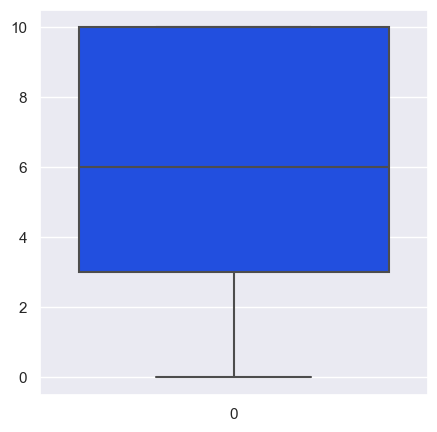

In [89]:
plt.figure(figsize=(5, 5))
sns.boxplot(loan_data['emp_length'])

tidak ada outlier, jadi teknik imputasi terbaik adalah mengganti null dengan nilai mean emp_length.

In [90]:
print(f'percentage of each record in \033[1memp_length\033[0m')
print(loan_data['emp_length'].value_counts(normalize=True)*100)
print('_____'*10, '\n')
print(f'statistics of column \033[1memp_length\033[0m')
print(loan_data['emp_length'].describe())

percentage of each record in emp_length
10.0    33.697900
2.0      9.291520
3.0      8.218704
0.0      8.144369
5.0      6.911204
1.0      6.652488
4.0      6.293386
7.0      5.879486
6.0      5.864215
8.0      5.029454
9.0      4.017275
Name: emp_length, dtype: float64
__________________________________________________ 

statistics of column emp_length
count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64


In [91]:
# imputation technique for emp_length
loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].mean())

In [92]:
loan_data['emp_length'].isnull().sum()

0

##### treatment for column: inq_last_6mths

<Axes: >

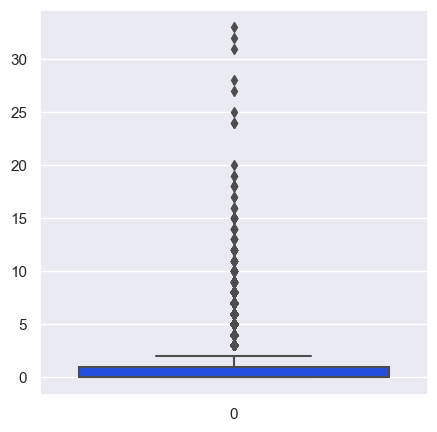

In [93]:
plt.figure(figsize=(5, 5))
sns.boxplot(loan_data['inq_last_6mths'])

imputasi terbaik adalah mengganti null dengan median nilai inq_last_6mths.

In [94]:
print(f'percentage of each record in \033[1meinq_last_6mths\033[0m')
print(loan_data['inq_last_6mths'].value_counts(normalize=True)*100)
print('_____'*10, '\n')
print(f'statistics of column \033[1minq_last_6mths\033[0m')
print(loan_data['inq_last_6mths'].describe())

percentage of each record in einq_last_6mths
0.0     51.795151
1.0     27.913421
2.0     12.401985
3.0      5.388885
4.0      1.553010
5.0      0.593665
6.0      0.254796
7.0      0.041823
8.0      0.026166
9.0      0.010724
10.0     0.005147
11.0     0.003217
12.0     0.003217
15.0     0.001930
13.0     0.001287
14.0     0.001287
18.0     0.000858
16.0     0.000643
17.0     0.000429
24.0     0.000429
19.0     0.000429
32.0     0.000214
33.0     0.000214
31.0     0.000214
28.0     0.000214
25.0     0.000214
27.0     0.000214
20.0     0.000214
Name: inq_last_6mths, dtype: float64
__________________________________________________ 

statistics of column inq_last_6mths
count    466256.000000
mean          0.804745
std           1.091598
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64


In [95]:
# Imputation Technique for 'inq_last_6mths'
loan_data['inq_last_6mths'] = loan_data['inq_last_6mths'].fillna(loan_data['inq_last_6mths'].median())

In [96]:
loan_data['inq_last_6mths'].isnull().sum()

0

##### treatment for column: delinq_2yrs

<Axes: >

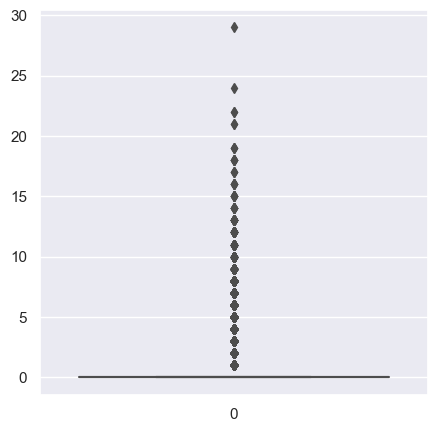

In [97]:
plt.figure(figsize=(5, 5))
sns.boxplot(loan_data['delinq_2yrs'])

In [98]:
print(f'percentage of each record in \033[1mdelinq_2yrs\033[0m')
print(loan_data['delinq_2yrs'].value_counts(normalize=True)*100)
print('_____'*10, '\n')
print(f'statistics of column \033[1mdelinq_2yrs\033[0m')
print(loan_data['delinq_2yrs'].describe())

percentage of each record in delinq_2yrs
0.0     82.133849
1.0     12.058612
2.0      3.498078
3.0      1.219073
4.0      0.510020
5.0      0.265090
6.0      0.134904
7.0      0.074208
8.0      0.037962
9.0      0.023807
10.0     0.013941
11.0     0.008793
12.0     0.008150
13.0     0.005362
14.0     0.001716
15.0     0.001501
18.0     0.001287
16.0     0.001072
17.0     0.000643
19.0     0.000643
21.0     0.000429
22.0     0.000429
29.0     0.000214
24.0     0.000214
Name: delinq_2yrs, dtype: float64
__________________________________________________ 

statistics of column delinq_2yrs
count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


In [99]:
# Imputation Technique for 'delinq_2yrs'
loan_data['delinq_2yrs'] = loan_data['delinq_2yrs'].fillna(loan_data['delinq_2yrs'].median())

In [100]:
loan_data['delinq_2yrs'].isnull().sum()

0

##### treatment for columns: focus_col10

In [101]:
focus_col10 = ['annual_inc', 'open_acc', 'pub_rec','revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim', 'mths_since_next_pymnt_d', 'mths_since_issue_d', 'mths_since_earliest_cr_line', 'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d']

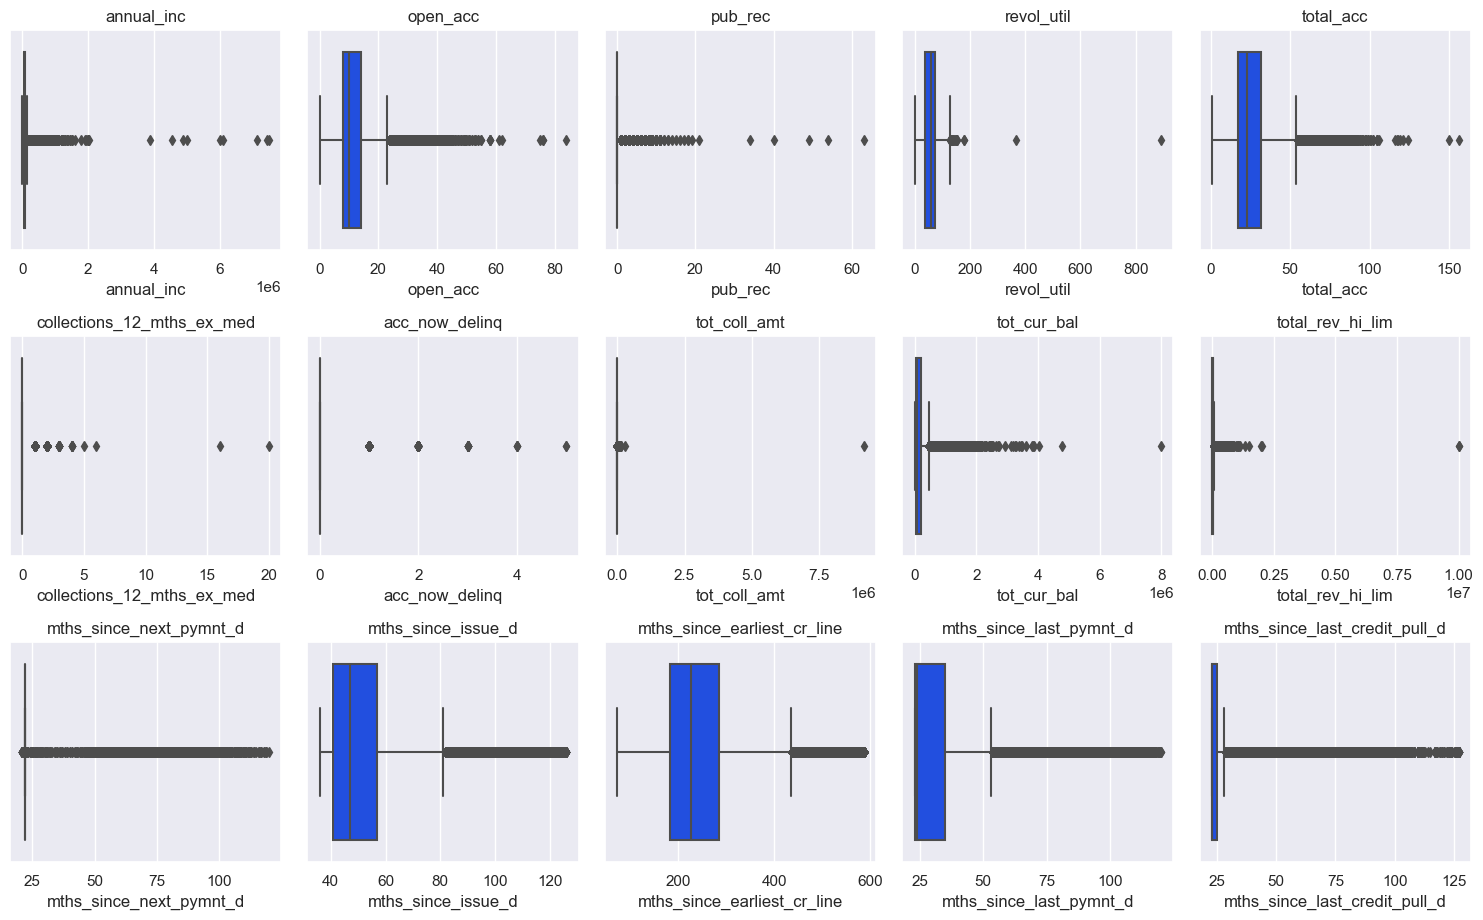

In [102]:
# create a figure with subplots
num_col = len(focus_col10)
num_row = (num_col + 7) // 4
fig, axes = plt.subplots(nrows=num_row, ncols=5, figsize=(15, 3*num_row))
axes = axes.flatten()

# create a boxplot for each numerical variable using seaborn
for i, col in enumerate(focus_col10):
    sns.boxplot(x=loan_data[col], ax=axes[i])
    axes[i].set_title(col)
    
# remove any extra empty subplots if needed
if num_col < len(axes):
    for i in range(num_col, len(axes)):
        fig.delaxes(axes[i])
        
# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [103]:
for col in focus_col10:
    print(loan_data[focus_col10].describe())

         annual_inc       open_acc        pub_rec     revol_util  \
count  4.662810e+05  466256.000000  466256.000000  465945.000000   
mean   7.327738e+04      11.187069       0.160564      56.176947   
std    5.496357e+04       4.987526       0.510863      23.732628   
min    1.896000e+03       0.000000       0.000000       0.000000   
25%    4.500000e+04       8.000000       0.000000      39.200000   
50%    6.300000e+04      10.000000       0.000000      57.600000   
75%    8.896000e+04      14.000000       0.000000      74.700000   
max    7.500000e+06      84.000000      63.000000     892.300000   

           total_acc  collections_12_mths_ex_med  acc_now_delinq  \
count  466256.000000               466140.000000   466256.000000   
mean       25.064430                    0.009085        0.004002   
std        11.600141                    0.108648        0.068637   
min         1.000000                    0.000000        0.000000   
25%        17.000000                    0.00000

In [104]:
for col in focus_col10:
    print(f'value counts of column \033[1m{col}\033[0m')
    print(loan_data[col].value_counts())
    print('_____'*10, '\n')

value counts of column annual_inc
60000.0     17980
50000.0     15949
65000.0     13211
40000.0     12864
70000.0     12436
            ...  
93548.0         1
80840.0         1
257100.0        1
91660.0         1
72787.0         1
Name: annual_inc, Length: 31901, dtype: int64
__________________________________________________ 

value counts of column open_acc
9.0     44019
10.0    42512
8.0     41893
11.0    39112
7.0     37602
        ...  
55.0        2
62.0        1
84.0        1
75.0        1
61.0        1
Name: open_acc, Length: 62, dtype: int64
__________________________________________________ 

value counts of column pub_rec
0.0     404893
1.0      53051
2.0       5624
3.0       1611
4.0        520
5.0        276
6.0        136
7.0         62
8.0         29
9.0         16
10.0        13
11.0         8
12.0         2
18.0         2
13.0         2
40.0         1
34.0         1
21.0         1
63.0         1
54.0         1
14.0         1
15.0         1
16.0         1
19.0         

In [105]:
# missing value ~0.1%- 0.8%
loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data['annual_inc'].median())
loan_data['open_acc'] = loan_data['open_acc'].fillna(loan_data['open_acc'].median())
loan_data['pub_rec'] = loan_data['pub_rec'].fillna(loan_data['pub_rec'].median())
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].median())
loan_data['total_acc'] = loan_data['total_acc'].fillna(loan_data['total_acc'].median())
loan_data['collections_12_mths_ex_med'] = loan_data['collections_12_mths_ex_med'].fillna(loan_data['collections_12_mths_ex_med'].median())
loan_data['acc_now_delinq'] = loan_data['acc_now_delinq'].fillna(loan_data['acc_now_delinq'].median())
loan_data['mths_since_issue_d'] = loan_data['mths_since_issue_d'].fillna(loan_data['mths_since_issue_d'].median())
loan_data['mths_since_earliest_cr_line'] = loan_data['mths_since_earliest_cr_line'].fillna(loan_data['mths_since_earliest_cr_line'].median())
loan_data['mths_since_last_pymnt_d'] = loan_data['mths_since_last_pymnt_d'].fillna(loan_data['mths_since_last_pymnt_d'].median())
loan_data['mths_since_last_credit_pull_d'] = loan_data['mths_since_last_credit_pull_d'].fillna(loan_data['mths_since_last_credit_pull_d'].median())

# missing value ~15%
loan_data['tot_coll_amt'] = loan_data['tot_coll_amt'].fillna(0)
loan_data['tot_cur_bal'] = loan_data['tot_cur_bal'].fillna(0)
loan_data['total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].fillna(0)

# missing value ~48%
loan_data['mths_since_next_pymnt_d'] = loan_data['mths_since_next_pymnt_d'].fillna(0)

In [106]:
for col in focus_col10:
    print(f'missing value of column \033[1m{col}\033[0m')
    print(loan_data[col].isnull().sum())
    print('_____'*10, '\n')

missing value of column annual_inc
0
__________________________________________________ 

missing value of column open_acc
0
__________________________________________________ 

missing value of column pub_rec
0
__________________________________________________ 

missing value of column revol_util
0
__________________________________________________ 

missing value of column total_acc
0
__________________________________________________ 

missing value of column collections_12_mths_ex_med
0
__________________________________________________ 

missing value of column acc_now_delinq
0
__________________________________________________ 

missing value of column tot_coll_amt
0
__________________________________________________ 

missing value of column tot_cur_bal
0
__________________________________________________ 

missing value of column total_rev_hi_lim
0
__________________________________________________ 

missing value of column mths_since_next_pymnt_d
0
___________________________

In [107]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 67 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   term                                 466285 non-null  int64  
 2   int_rate                             466285 non-null  float64
 3   installment                          466285 non-null  float64
 4   emp_length                           466285 non-null  float64
 5   annual_inc                           466285 non-null  float64
 6   loan_status                          466285 non-null  int64  
 7   dti                                  466285 non-null  float64
 8   delinq_2yrs                          466285 non-null  float64
 9   inq_last_6mths                       466285 non-null  float64
 10  open_acc                             466285 non-null  float64
 11  pub_rec      

In [108]:
loan_data.select_dtypes(include='float')

,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,...,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_next_pymnt_d,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,83.7,...,0.0,0.0,0.0,0.0,0.0,0.0,72.0,395.0,35.0,23.0
1,15.27,59.83,0.0,30000.0,1.00,0.0,5.0,3.0,0.0,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,72.0,224.0,56.0,51.0
2,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,98.5,...,0.0,0.0,0.0,0.0,0.0,0.0,72.0,193.0,42.0,23.0
3,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72.0,262.0,35.0,35.0
4,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,53.9,...,0.0,0.0,0.0,0.0,0.0,22.0,72.0,263.0,23.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,432.64,4.0,110000.0,19.85,0.0,2.0,18.0,0.0,77.6,...,0.0,0.0,0.0,294998.0,29900.0,22.0,47.0,176.0,23.0,23.0
466281,19.97,582.50,10.0,78000.0,18.45,0.0,5.0,18.0,1.0,46.3,...,0.0,0.0,0.0,221830.0,39400.0,0.0,47.0,246.0,36.0,23.0
466282,16.99,514.34,7.0,46000.0,25.65,0.0,2.0,18.0,0.0,51.1,...,0.0,0.0,0.0,73598.0,13100.0,22.0,47.0,192.0,23.0,24.0
466283,7.90,62.59,3.0,83000.0,5.39,3.0,1.0,21.0,0.0,21.5,...,0.0,0.0,0.0,591610.0,53100.0,0.0,47.0,178.0,36.0,32.0


In [109]:
# transform data type into integer
focus_col11 = ['emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 
               'acc_now_delinq','tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim', 'mths_since_next_pymnt_d', 'mths_since_issue_d',
               'mths_since_earliest_cr_line', 'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d']

In [110]:
loan_data[focus_col11] = loan_data[focus_col11].astype('int')

In [111]:
loan_data.select_dtypes(include='float')

,int_rate,installment,dti,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,10.65,162.87,27.65,83.7,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62
1,15.27,59.83,1.00,9.4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,15.96,84.33,8.72,98.5,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91
3,13.49,339.31,20.00,21.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48
4,12.69,67.79,17.94,53.9,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,432.64,19.85,77.6,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64
466281,19.97,582.50,18.45,46.3,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50
466282,16.99,514.34,25.65,51.1,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34
466283,7.90,62.59,5.39,21.5,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68


#### 1.7.3 integer

In [112]:
loan_data.select_dtypes(include='int')

,loan_amnt,term,emp_length,annual_inc,loan_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_next_pymnt_d,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,5000,36,10,24000,1,0,1,3,0,13648,...,0,0,0,0,0,0,72,395,35,23
1,2500,60,0,30000,0,0,5,3,0,1687,...,0,0,0,0,0,0,72,224,56,51
2,2400,36,10,12252,1,0,2,2,0,2956,...,0,0,0,0,0,0,72,193,42,23
3,10000,36,10,49200,1,0,1,10,0,5598,...,0,0,0,0,0,0,72,262,35,35
4,3000,60,1,80000,1,0,0,15,0,27783,...,0,0,0,0,0,22,72,263,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,60,4,110000,1,0,2,18,0,23208,...,0,0,0,294998,29900,22,47,176,23,23
466281,22000,60,10,78000,0,0,5,18,1,18238,...,0,0,0,221830,39400,0,47,246,36,23
466282,20700,60,7,46000,1,0,2,18,0,6688,...,0,0,0,73598,13100,22,47,192,23,24
466283,2000,36,3,83000,1,3,1,21,0,11404,...,0,0,0,591610,53100,0,47,178,36,32


### 1.8 Create New Dataframe

In [113]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 67 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   term                                 466285 non-null  int64  
 2   int_rate                             466285 non-null  float64
 3   installment                          466285 non-null  float64
 4   emp_length                           466285 non-null  int32  
 5   annual_inc                           466285 non-null  int32  
 6   loan_status                          466285 non-null  int64  
 7   dti                                  466285 non-null  float64
 8   delinq_2yrs                          466285 non-null  int32  
 9   inq_last_6mths                       466285 non-null  int32  
 10  open_acc                             466285 non-null  int32  
 11  pub_rec      

In [114]:
# define a new dataframe 
new_loan_data = loan_data
new_loan_data.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,initial_list_status_f,initial_list_status_w
0,5000,36,10.65,162.87,10,24000,1,27.65,0,1,...,0,0,0,0,0,395,35,23,1,0
1,2500,60,15.27,59.83,0,30000,0,1.00,0,5,...,0,0,0,0,0,224,56,51,1,0
2,2400,36,15.96,84.33,10,12252,1,8.72,0,2,...,0,0,1,0,0,193,42,23,1,0
3,10000,36,13.49,339.31,10,49200,1,20.00,0,1,...,1,0,0,0,0,262,35,35,1,0
4,3000,60,12.69,67.79,1,80000,1,17.94,0,0,...,1,0,0,0,0,263,23,23,1,0


In [115]:
# Function to impute missing values by column
def missing_value_table(df):
    # Total Missing Value
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Create a table with calculation results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename columns in the table
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Jumlah Nilai Hilang', 1: '% dari Total Nilai'})
    
    # Sorts the table based on the percentage of missing values in descending order
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% dari Total Nilai', ascending=False).round(1)
    
    # Displays Summary Information
    print("Dataframe yang Anda pilih memiliki " + str(df.shape[1]) + " kolom.\n"
          "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
          " kolom yang memiliki nilai yang hilang.")
    
    # Returns a dataframe with missing value information
    return mis_val_table_ren_columns

In [116]:
# Displays Missing Value Statistics
missing_values = missing_value_table(new_loan_data)
missing_values

Dataframe yang Anda pilih memiliki 67 kolom.
Terdapat 0 kolom yang memiliki nilai yang hilang.


,Jumlah Nilai Hilang,% dari Total Nilai


In [117]:
new_loan_data.to_csv('clean_loan_dataset.csv')

In [118]:
df_clean = pd.read_csv('clean_loan_dataset.csv')
df_clean.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,initial_list_status_f,initial_list_status_w
0,0,5000,36,10.65,162.87,10,24000,1,27.65,0,...,0,0,0,0,0,395,35,23,1,0
1,1,2500,60,15.27,59.83,0,30000,0,1.00,0,...,0,0,0,0,0,224,56,51,1,0
2,2,2400,36,15.96,84.33,10,12252,1,8.72,0,...,0,0,1,0,0,193,42,23,1,0
3,3,10000,36,13.49,339.31,10,49200,1,20.00,0,...,1,0,0,0,0,262,35,35,1,0
4,4,3000,60,12.69,67.79,1,80000,1,17.94,0,...,1,0,0,0,0,263,23,23,1,0


In [119]:
df_clean.drop('Unnamed: 0', axis=1, inplace=True)

In [120]:
df_clean.shape

(466285, 67)

### 1.9 normalization

min-max scaler method

In [121]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(df_clean)
df_scaled=model.transform(df_clean)
 
# print scaled features
print(df_scaled)

[[0.13043478 0.         0.25339147 ... 0.         1.         0.        ]
 [0.05797101 1.         0.47722868 ... 0.26923077 1.         0.        ]
 [0.05507246 0.         0.51065891 ... 0.         1.         0.        ]
 ...
 [0.58550725 1.         0.56056202 ... 0.00961538 1.         0.        ]
 [0.04347826 0.         0.12015504 ... 0.08653846 0.         1.        ]
 [0.27536232 0.         0.66763566 ... 0.         1.         0.        ]]


In [122]:
df_scaled = pd.DataFrame(df_scaled, index=df_clean.index, columns=df_clean.columns)
df_scaled

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,initial_list_status_f,initial_list_status_w
0,0.130435,0.0,0.253391,0.105571,1.0,0.002948,1.0,0.691423,0.000000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.626459,0.123711,0.000000,1.0,0.0
1,0.057971,1.0,0.477229,0.031671,0.0,0.003748,0.0,0.025006,0.000000,0.151515,...,0.0,0.0,0.0,0.0,0.0,0.293774,0.340206,0.269231,1.0,0.0
2,0.055072,0.0,0.510659,0.049243,1.0,0.001381,1.0,0.218055,0.000000,0.060606,...,0.0,0.0,1.0,0.0,0.0,0.233463,0.195876,0.000000,1.0,0.0
3,0.275362,0.0,0.390988,0.232113,1.0,0.006309,1.0,0.500125,0.000000,0.030303,...,1.0,0.0,0.0,0.0,0.0,0.367704,0.123711,0.115385,1.0,0.0
4,0.072464,1.0,0.352229,0.037380,0.1,0.010416,1.0,0.448612,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.369650,0.000000,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.518841,1.0,0.438469,0.299049,0.4,0.014418,1.0,0.496374,0.000000,0.060606,...,0.0,0.0,0.0,0.0,0.0,0.200389,0.000000,0.000000,0.0,1.0
466281,0.623188,1.0,0.704942,0.406528,1.0,0.010150,0.0,0.461365,0.000000,0.151515,...,0.0,0.0,0.0,0.0,0.0,0.336576,0.134021,0.000000,1.0,0.0
466282,0.585507,1.0,0.560562,0.357644,0.7,0.005882,1.0,0.641410,0.000000,0.060606,...,0.0,0.0,0.0,0.0,0.0,0.231518,0.000000,0.009615,1.0,0.0
466283,0.043478,0.0,0.120155,0.033651,0.3,0.010817,1.0,0.134784,0.103448,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.204280,0.134021,0.086538,0.0,1.0


In [123]:
final_data = df_scaled

## Model Training and Prediction

### Data Splitting

Create a training dataset and a test dataset, with a comparison of 80% for training data and 20% for testing data

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
# separate dependant (y) and independant (X) variable
X = final_data.drop('loan_status', axis = 1)
y = final_data['loan_status'] # Target Variable

In [126]:
#spliting data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [127]:
# Print the shape of the resulting sets to verify the split
print("Training data shape - Features:", X_train.shape, " Labels:", y_train.shape)
print("Testing data shape - Features:", X_test.shape, " Labels:", y_test.shape)

Training data shape - Features: (373028, 66)  Labels: (373028,)
Testing data shape - Features: (93257, 66)  Labels: (93257,)


### Checking for Class Imbalance in Final Dataset

<Axes: title={'center': 'Good (1) vs Bad (0) Loans Balance'}>

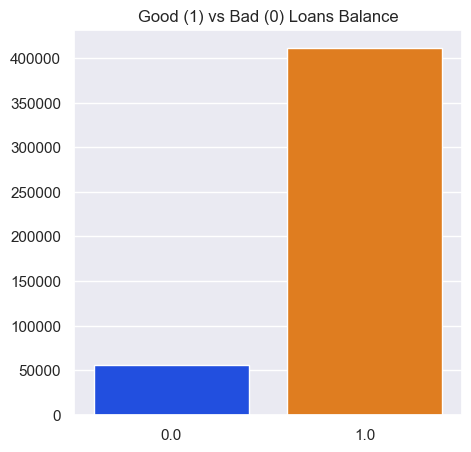

In [128]:
#check if class labels are balanced
plt.figure(figsize=(5, 5))
plt.title('Good (1) vs Bad (0) Loans Balance')
sns.barplot(x=final_data.loan_status.value_counts().index,y=final_data.loan_status.value_counts().values)

In [129]:
# Check class distribution in training set
print("Training Set - Class Distribution:")
print(y_train.value_counts())

# Check class distribution in testing set
print("\nTesting Set - Class Distribution:")
print(y_test.value_counts())


Training Set - Class Distribution:
1.0    328762
0.0     44266
Name: loan_status, dtype: int64

Testing Set - Class Distribution:
1.0    82191
0.0    11066
Name: loan_status, dtype: int64


Dari chart dan data diatas, data yang tergolong kredit macet mempunyai data yang lebih sedikit dibandingkan data kredit baik. Dengan demikian, dataset ini memiliki data yang tidak seimbang.

### Train the model without handling the imbalanced class distribution

In [130]:
# Import Library
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

Train the model without handling the imbalance class distribution using Logistic Regression

In [131]:
# Logistic Regression Model Training
LR= LogisticRegression(max_iter=600)
LR.fit(X_train, y_train)

# Making Prediction
y_pred_LR = LR.predict(X_test)

# classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_LR, digits=3, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan      0.984     0.744     0.847     11066
   good loan      0.967     0.998     0.982     82191

    accuracy                          0.968     93257
   macro avg      0.975     0.871     0.915     93257
weighted avg      0.969     0.968     0.966     93257



<Axes: title={'center': 'Confussion Matrix Logistic Regression'}>

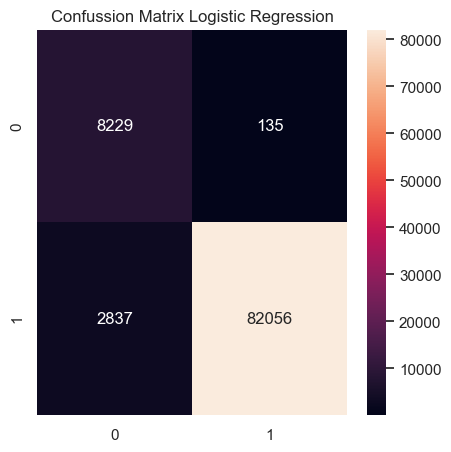

In [132]:
# confussion matrix

matrix_LR = confusion_matrix(y_pred_LR, y_test)

plt.figure(figsize=(5, 5))
plt.title('Confussion Matrix Logistic Regression')
sns.heatmap(matrix_LR, annot = True, fmt='d')

In [133]:
# Predict probabilities for the positive class
y_prob_LR = LR.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob_LR)

# Print ROC-AUC score
print(f'ROC-AUC Score: {roc_auc:.3f}')

ROC-AUC Score: 0.956


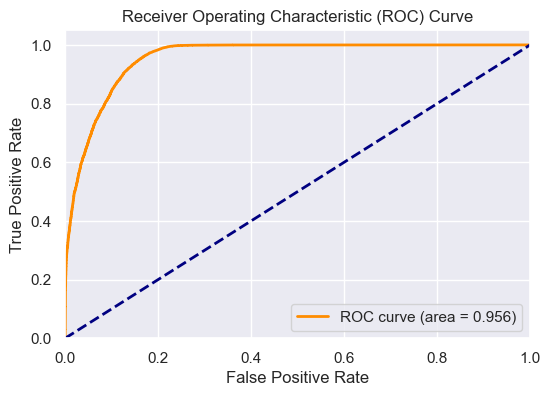

In [134]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_LR)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Oversampling Minority Class to Resolve Class Imbalance

In [135]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#check value counts before and after oversampling
print('Before OverSampling:\n{}'.format(y_train.value_counts()))
print('\nAfter OverSampling:\n{}'.format(y_train_ros.value_counts()))

Before OverSampling:
1.0    328762
0.0     44266
Name: loan_status, dtype: int64

After OverSampling:
1.0    328762
0.0    328762
Name: loan_status, dtype: int64


<Axes: title={'center': 'Good (1) vs Bad (0) Loans Balance'}, xlabel='loan_status', ylabel='count'>

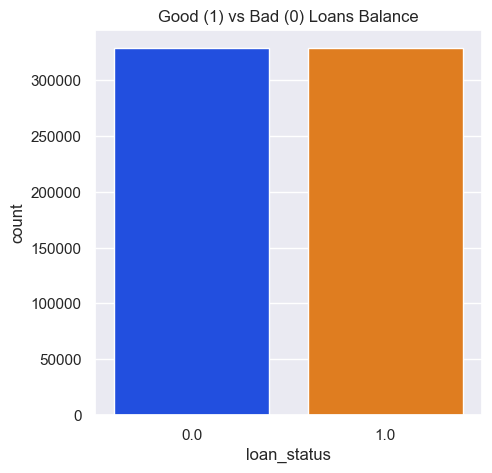

In [136]:
# Dataset after oversampling
plt.figure(figsize=(5, 5))
plt.title('Good (1) vs Bad (0) Loans Balance')
sns.countplot(x= y_train_ros)

### Train the model after oversampling

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

1. Logistic Regression

In [138]:
# Logistic Regression Model Training after oversampling
LR_ros= LogisticRegression(max_iter=600)  
LR_ros.fit(X_train_ros, y_train_ros)

# predicting
y_pred_LR_ros = LR_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_LR_ros, digits=3, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan      0.803     0.817     0.810     11066
   good loan      0.975     0.973     0.974     82191

    accuracy                          0.954     93257
   macro avg      0.889     0.895     0.892     93257
weighted avg      0.955     0.954     0.955     93257



<Axes: title={'center': 'Confussion Matrix Logistic Regression'}>

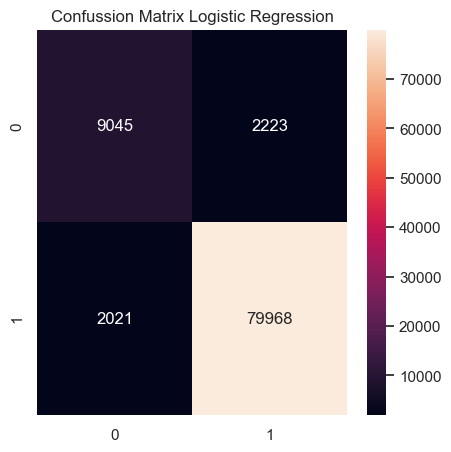

In [139]:
# confussion matrix Logistic Regression

matrix_LR_ros = confusion_matrix(y_pred_LR_ros, y_test)

plt.figure(figsize=(5, 5))
plt.title('Confussion Matrix Logistic Regression')
sns.heatmap(matrix_LR_ros, annot = True, fmt='d')

In [140]:
# Predict probabilities for the positive class
y_prob_LR_ros = LR_ros.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc_LR = roc_auc_score(y_test, y_prob_LR_ros)

# Print ROC-AUC score
print(f'ROC-AUC Score: {roc_auc_LR:.3f}')

ROC-AUC Score: 0.961


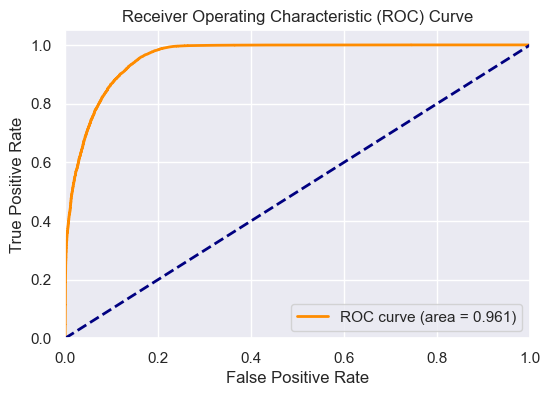

In [141]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_LR_ros)

# Calculate the area under the ROC curve (AUC)
roc_auc_LR = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_LR:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation

In [142]:
# Create a LogisticRegression
model = LogisticRegression(max_iter=600)

# Inisialisasi Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print('Cross-Validation Scores:', cross_val_scores)
print('Mean Accuracy:', cross_val_scores.mean())
print('Standard Deviation:', cross_val_scores.std())

Cross-Validation Scores: [0.96818469 0.96803457 0.96892458 0.96813108 0.96738046]
Mean Accuracy: 0.9681310786321671
Standard Deviation: 0.0004909707676734192


2. Random Forest

In [143]:
# Random Forest Training Model After Oversampling
RF_ros = RandomForestClassifier(max_depth=100, n_estimators=500)
RF_ros.fit(X_train_ros, y_train_ros)

# Predicting
y_pred_RF_ros = RF_ros.predict(X_test)

# Classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_RF_ros, digits=3, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan      0.995     0.893     0.941     11066
   good loan      0.986     0.999     0.993     82191

    accuracy                          0.987     93257
   macro avg      0.990     0.946     0.967     93257
weighted avg      0.987     0.987     0.986     93257



<Axes: title={'center': 'Confussion Matrix Random Forest'}>

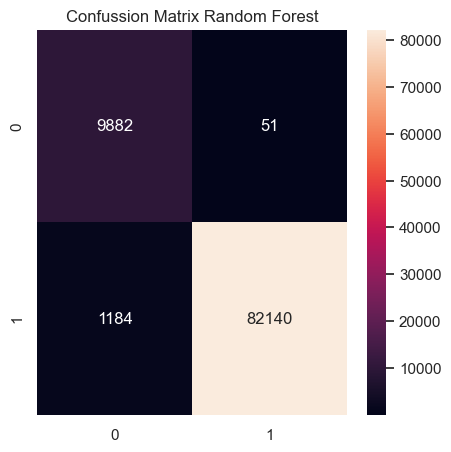

In [144]:
# confussion matrix Random Forest

matrix_RF_ros = confusion_matrix(y_pred_RF_ros, y_test)

plt.figure(figsize=(5, 5))
plt.title('Confussion Matrix Random Forest')
sns.heatmap(matrix_RF_ros, annot = True, fmt='d')

In [145]:
# Predict probabilities for the positive class
y_prob_RF_ros = RF_ros.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc_RF = roc_auc_score(y_test, y_prob_RF_ros)

# Print ROC-AUC score
print(f'ROC-AUC Score: {roc_auc_RF:.3f}')

ROC-AUC Score: 0.991


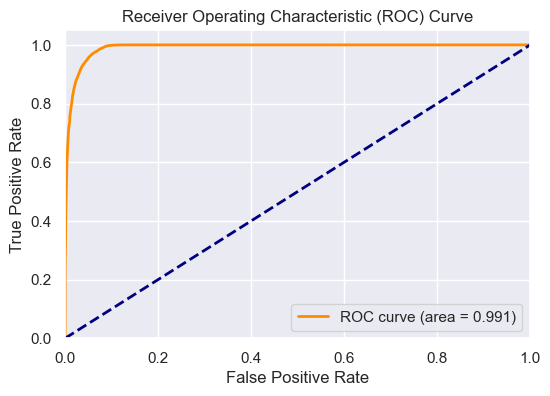

In [146]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_RF_ros)

# Calculate the area under the ROC curve (AUC)
roc_auc_RF = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_RF:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation

In [147]:
# Create a RandomForestClassifier
model = RandomForestClassifier(max_depth=10, n_estimators=20)

# Inisialisasi Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print('Cross-Validation Scores:', cross_val_scores)
print('Mean Accuracy:', cross_val_scores.mean())
print('Standard Deviation:', cross_val_scores.std())

Cross-Validation Scores: [0.98100947 0.9783716  0.97926161 0.98176008 0.98046259]
Mean Accuracy: 0.980173070118061
Standard Deviation: 0.001214747575285075


In [148]:
# Retrieves feature importance values from the model
feature_importances_rf = RF_ros.feature_importances_

# Create a DataFrame with the feature name and feature importance value
feature_importance_rf = pd.DataFrame({'Feature': X_train_ros.columns, 'Importance': feature_importances_rf})

# Sorts DataFrame based on descending feature importance values
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# print top 20 feature importance
print('Top 20 Feature Importance:')
print(feature_importance_rf.head(20))

Top 20 Feature Importance:
                          Feature  Importance
62        mths_since_last_pymnt_d    0.177143
23                last_pymnt_amnt    0.112890
18                total_rec_prncp    0.104534
21                     recoveries    0.085036
22        collection_recovery_fee    0.068399
16                    total_pymnt    0.045352
15                  out_prncp_inv    0.040042
14                      out_prncp    0.038773
17                total_pymnt_inv    0.037548
0                       loan_amnt    0.030750
3                     installment    0.030719
29        mths_since_next_pymnt_d    0.024452
63  mths_since_last_credit_pull_d    0.022270
19                  total_rec_int    0.021373
20             total_rec_late_fee    0.020545
2                        int_rate    0.016108
46             mths_since_issue_d    0.015613
28               total_rev_hi_lim    0.010054
27                    tot_cur_bal    0.009949
11                      revol_bal    0.008336


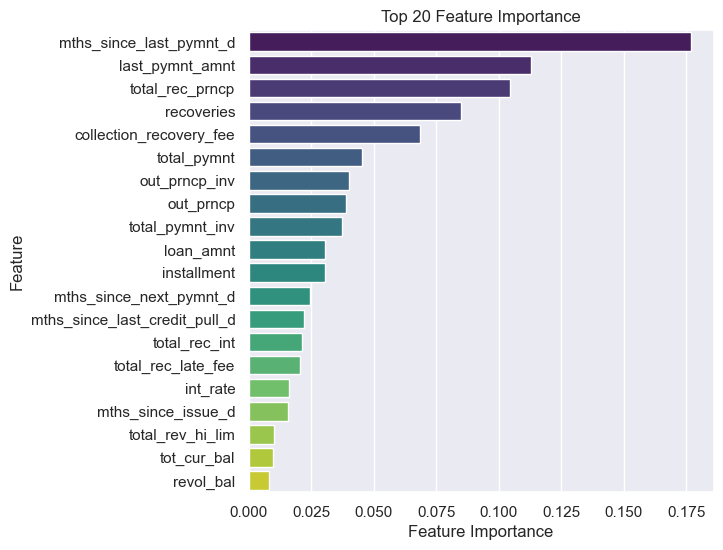

In [149]:
# Taking top 20 feature importance Random Forest Model
top_20_features_rf = feature_importance_rf.head(20)

# create barplot
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=top_20_features_rf, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance')
plt.show()


3. Decision Tree

In [150]:
# Decision Tree Training Model After Oversampling
DT_ros = DecisionTreeClassifier(max_depth = 10)
DT_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_DT_ros = DT_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_DT_ros, digits=3, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan      0.807     0.917     0.859     11066
   good loan      0.989     0.970     0.979     82191

    accuracy                          0.964     93257
   macro avg      0.898     0.944     0.919     93257
weighted avg      0.967     0.964     0.965     93257



<Axes: title={'center': 'Confussion Matrix Decision Tree'}>

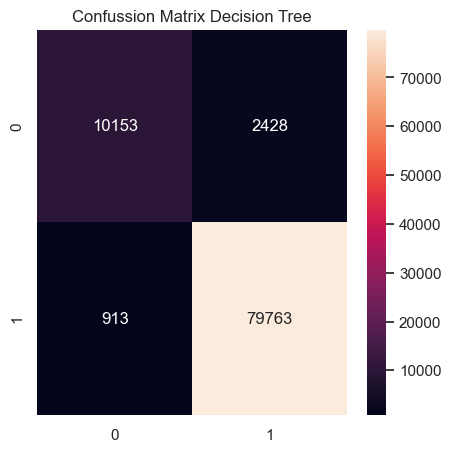

In [151]:
# confussion matrix Decision Tree

matrix_DT = confusion_matrix(y_pred_DT_ros, y_test)
plt.figure(figsize=(5, 5))
plt.title('Confussion Matrix Decision Tree')
sns.heatmap(matrix_DT, annot = True, fmt='d')

In [152]:
# Predict probabilities for the positive class
y_prob_DT_ros = DT_ros.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc_DT = roc_auc_score(y_test, y_prob_DT_ros)

# Print ROC-AUC score
print(f'ROC-AUC Score: {roc_auc_DT:.3f}')

ROC-AUC Score: 0.983


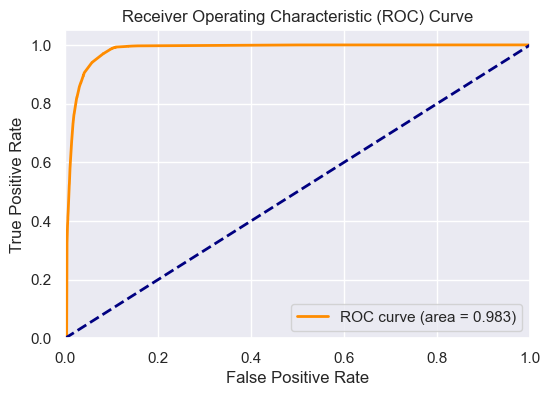

In [153]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_DT_ros)

# Calculate the area under the ROC curve (AUC)
roc_auc_DT = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_DT:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation

In [154]:
# Create a Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=10)

# Inisialisasi Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print('Cross-Validation Scores:', cross_val_scores)
print('Mean Accuracy:', cross_val_scores.mean())
print('Standard Deviation:', cross_val_scores.std())

Cross-Validation Scores: [0.97857533 0.97939029 0.97993716 0.9791651  0.97904715]
Mean Accuracy: 0.9792230073881854
Standard Deviation: 0.00044536711298038525


4. XGBoost

In [155]:
#building model
from xgboost import XGBClassifier
xgb_ros = XGBClassifier(max_depth=5)
xgb_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_xgb_ros = xgb_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb_ros, digits=3, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan      0.899     0.925     0.912     11066
   good loan      0.990     0.986     0.988     82191

    accuracy                          0.979     93257
   macro avg      0.944     0.955     0.950     93257
weighted avg      0.979     0.979     0.979     93257



<Axes: title={'center': 'Confussion Matrix XGBoost'}>

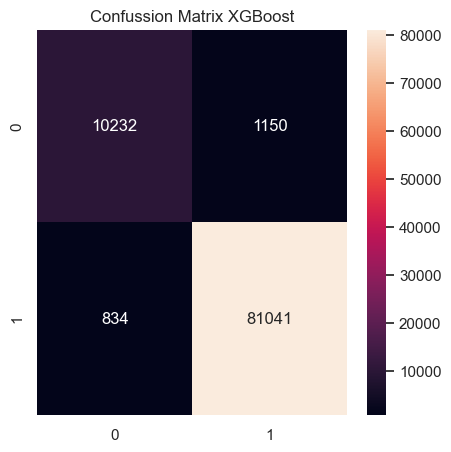

In [165]:
# confussion matrix

matrix_XGB = confusion_matrix(y_pred_xgb_ros, y_test)
plt.figure(figsize=(5, 5))
plt.title('Confussion Matrix XGBoost')
sns.heatmap(matrix_XGB, annot = True, fmt='d')

In [157]:
# Predict probabilities for the positive class
y_prob_xgb_ros = xgb_ros.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb_ros)

# Print ROC-AUC score
print(f'ROC-AUC Score: {roc_auc_xgb:.3f}')

ROC-AUC Score: 0.992


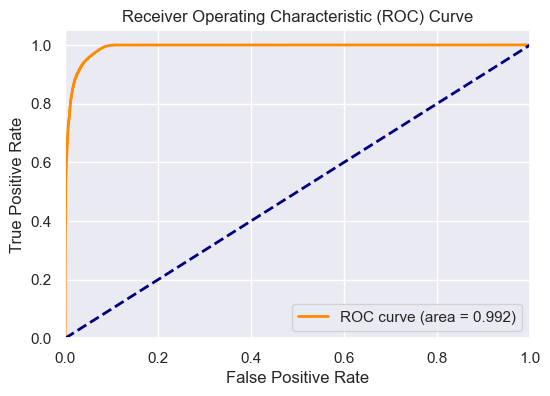

In [158]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb_ros)

# Calculate the area under the ROC curve (AUC)
roc_auc_xgb = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation

In [159]:
# Create a XGBoost Classifier
model = XGBClassifier(max_depth=5)

# Inisialisasi Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print('Cross-Validation Scores:', cross_val_scores)
print('Mean Accuracy:', cross_val_scores.mean())
print('Standard Deviation:', cross_val_scores.std())

Cross-Validation Scores: [0.98717523 0.98759342 0.98771138 0.98760415 0.98733607]
Mean Accuracy: 0.9874840494547327
Standard Deviation: 0.00019765357937729294


5. AdaBoost

In [160]:
#building model
adb_ros = AdaBoostClassifier(n_estimators = 100)
adb_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_adb_ros = adb_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_adb_ros, digits=3, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan      0.761     0.925     0.835     11066
   good loan      0.990     0.961     0.975     82191

    accuracy                          0.957     93257
   macro avg      0.876     0.943     0.905     93257
weighted avg      0.963     0.957     0.959     93257



<Axes: title={'center': 'Confussion Matrix Adaboost'}>

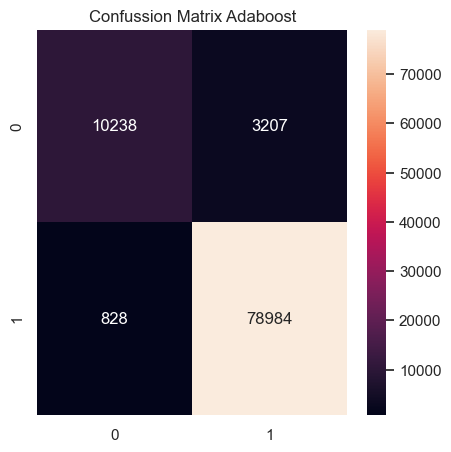

In [161]:
# confussion matrix

matrix_ADB = confusion_matrix(y_pred_adb_ros, y_test)
plt.figure(figsize=(5, 5))
plt.title('Confussion Matrix Adaboost')
sns.heatmap(matrix_ADB, annot = True, fmt='d')

In [162]:
# Predict probabilities for the positive class
y_prob_adb_ros = adb_ros.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc_adb = roc_auc_score(y_test, y_prob_adb_ros)

# Print ROC-AUC score
print(f'ROC-AUC Score: {roc_auc_adb:.3f}')

ROC-AUC Score: 0.986


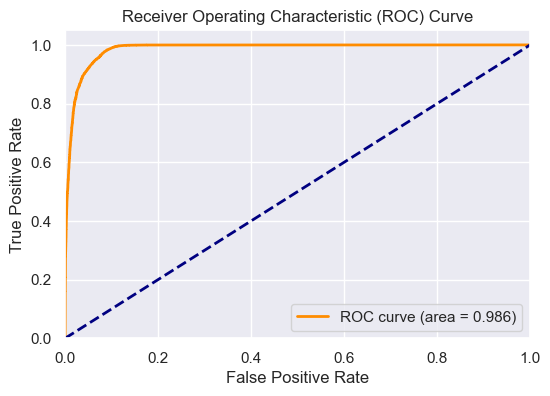

In [163]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_adb_ros)

# Calculate the area under the ROC curve (AUC)
roc_auc_adb = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_adb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation

In [164]:
# Create a AdaBoost Classifier
model = AdaBoostClassifier(n_estimators = 100)

# Inisialisasi Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print('Cross-Validation Scores:', cross_val_scores)
print('Mean Accuracy:', cross_val_scores.mean())
print('Standard Deviation:', cross_val_scores.std())

Cross-Validation Scores: [0.98275733 0.98337926 0.98412988 0.98336854 0.98314336]
Mean Accuracy: 0.9833556730325874
Standard Deviation: 0.0004479311833939224
